In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# reading dataset for india IPUMS
data_india = pd.read_stata('/users/quasar/downloads/ipumsi_00032.dta')
data_india.groupby('year').count()

,country,sample,serial,hhwt,geo1_in,pernum,perwt,age,sex,edattain,edattaind,educin,empstat,empstatd,indgen,classwk,classwkd,incwage
year,,,,,,,,,,,,,,,,,,
1983,324345,324345,324345,324345,324345,324345,324345,324345,324345,324345,324345,324345,324345,324345,324345,324345,324345,324345
1987,358279,358279,358279,358279,358279,358279,358279,358279,358279,358279,358279,358279,358279,358279,358279,358279,358279,358279
1993,317227,317227,317227,317227,317227,317227,317227,317227,317227,317227,317227,317227,317227,317227,317227,317227,317227,317227
1999,337746,337746,337746,337746,337746,337746,337746,337746,337746,337746,337746,337746,337746,337746,337746,337746,337746,337746
2004,350281,350281,350281,350281,350281,350281,350281,350281,350281,350281,350281,350281,350281,350281,350281,350281,350281,350281
2009,280162,280162,280162,280162,280162,280162,280162,280162,280162,280162,280162,280162,280162,280162,280162,280162,280162,0


In [3]:
# reading dataset for india IPUMS
#data_india = pd.read_stata('/users/quasar/downloads/ipumsi_00031.dta')
#data_india.groupby('year').count()

## Sector in economy - Agriculture, Industry, Services 

In [4]:
data_india.head(5)

,country,year,sample,serial,hhwt,geo1_in,pernum,perwt,age,sex,edattain,edattaind,educin,empstat,empstatd,indgen,classwk,classwkd,incwage
0,india,1983,india 1983,1000,"1,159.00",andhra pradesh,1,"1,159.00",32,male,secondary completed,"secondary, general track completed",secondary,employed,at work,public administration and defense,wage/salary worker,wage/salary worker,155.00
1,india,1983,india 1983,1000,"1,159.00",andhra pradesh,2,"1,159.00",28,female,primary completed,lower secondary general completed,middle,inactive,housework,niu (not in universe),niu (not in universe),niu (not in universe),0.00
2,india,1983,india 1983,2000,"1,159.00",andhra pradesh,1,"1,159.00",40,male,less than primary completed,no schooling,"illiterate, less than primary",employed,at work,"agriculture, fishing, and forestry",self-employed,self-employed,0.00
3,india,1983,india 1983,2000,"1,159.00",andhra pradesh,2,"1,159.00",34,female,less than primary completed,no schooling,"illiterate, less than primary",inactive,housework,niu (not in universe),niu (not in universe),niu (not in universe),0.00
4,india,1983,india 1983,4000,"1,159.00",andhra pradesh,1,"1,159.00",50,male,less than primary completed,no schooling,"illiterate, less than primary",employed,at work,"agriculture, fishing, and forestry",wage/salary worker,day laborer,35.00


In [5]:
"""
data_india['indgen'].replace(to_replace=['agriculture, fishing, and forestry'], value='Agriculture', inplace=True)
data_india['indgen'].replace(to_replace=['construction', 'manufacturing' ,'mining and extraction'], value='Industry', inplace=True)
data_india['indgen'].replace(to_replace=['hotels and restaurants','private household services',
                    'transportation, storage, and communications', 'wholesale and retail trade'], 
                    value='Unskilled service', inplace=True)
data_india['indgen'].replace(to_replace=['education', 'financial services and insurance','health and social work',
                    'public administration and defense',
                    'other services', 'business services and real estate', 
                    'electricity, gas, water and waste management' ], 
                    value='Skilled service', inplace=True)

indexNames = data_india[data_india['indgen'].isin(['unknown', 'niu (not in universe)'])].index
data_india = data_india.drop(indexNames)
data_india['indgen'].replace(to_replace=['niu (not in universe)', 'unknown'], value='Agriculture', inplace=True)
print("\nSector by labour share % ")
share = data_india.groupby('year')['indgen'].value_counts(normalize=True)
share
""";

In [6]:
data_india['indgen'].replace(to_replace=['agriculture, fishing, and forestry'], value='Agriculture', inplace=True)
data_india['indgen'].replace(to_replace=['manufacturing' ,'mining and extraction'], value='Industry', inplace=True)
data_india['indgen'].replace(to_replace=['construction', 'hotels and restaurants','private household services',
                    'transportation, storage, and communications', 'wholesale and retail trade', 'education', 
                    'financial services and insurance','health and social work',
                    'public administration and defense', 'other services', 'business services and real estate', 
                    'electricity, gas, water and waste management'], 
                    value='service', inplace=True)

indexNames = data_india[data_india['indgen'].isin(['unknown', 'niu (not in universe)'])].index
data_india = data_india.drop(indexNames)
data_india['indgen'].replace(to_replace=['niu (not in universe)', 'unknown'], value='Agriculture', inplace=True)
print("\nSector by labour share % ")
share = data_india.groupby('year')['indgen'].value_counts(normalize=True)
share


Sector by labour share % 


year             
1983  Agriculture   0.56
      service       0.30
      Industry      0.13
1987  Agriculture   0.54
      service       0.33
      Industry      0.13
1993  Agriculture   0.53
      service       0.35
      Industry      0.12
1999  Agriculture   0.50
      service       0.38
      Industry      0.12
2004  Agriculture   0.46
      service       0.41
      Industry      0.13
2009  service       0.51
      Agriculture   0.36
      Industry      0.13
Name: indgen, dtype: float64

In [85]:
data_india.classwk.value_counts(normalize=True)

wage/salary worker      0.43
self-employed           0.38
unpaid worker           0.15
niu (not in universe)   0.04
other                   0.00
unknown/missing         0.00
Name: classwk, dtype: float64

In [86]:
print(data_india.classwk.value_counts(normalize=True).to_latex())

\begin{tabular}{lr}
\toprule
{} &  classwk \\
\midrule
wage/salary worker    &     0.43 \\
self-employed         &     0.38 \\
unpaid worker         &     0.15 \\
niu (not in universe) &     0.04 \\
other                 &     0.00 \\
unknown/missing       &     0.00 \\
\bottomrule
\end{tabular}



## Mean of incwage (Wage) by year and sector

In [8]:
print("\nMean of incwage by year and sector\n")
print(data_india.groupby(['year','indgen', 'educin'])['incwage'].mean())


Mean of incwage by year and sector

year  indgen       educin                       
1983  Agriculture  illiterate, less than primary   2,643.35
                   literate, less than primary     1,588.83
                   primary                         1,568.48
                   middle                              9.31
                   secondary                       2,943.58
                   higher secondary                     NaN
                   undergraduate or graduate          15.44
                   unknown                            11.92
      Industry     illiterate, less than primary   7,930.10
                   literate, less than primary     5,615.53
                   primary                         2,212.11
                   middle                             72.52
                   secondary                         125.57
                   higher secondary                     NaN
                   undergraduate or graduate         229.56
              

## Median of incwage by year and sector 

In [9]:
print("\nMean of incwage by year and sector\n")
print(data_india.groupby(['year','indgen', 'classwk'])['incwage'].mean())


Mean of incwage by year and sector

year  indgen       classwk              
1983  Agriculture  niu (not in universe)    4,996.78
                   self-employed            1,498.08
                   wage/salary worker       2,637.26
                   unpaid worker            2,482.67
                   other                       59.93
                   unknown/missing               NaN
      Industry     niu (not in universe)       13.45
                   self-employed            2,363.98
                   wage/salary worker       6,209.98
                   unpaid worker                1.99
                   other                       34.40
                   unknown/missing               NaN
      service      niu (not in universe)   11,887.21
                   self-employed            1,059.03
                   wage/salary worker       1,315.88
                   unpaid worker                5.47
                   other                       42.45
                   un

In [10]:
print("\nMedian of incwage by year and sector\n")
print(data_india.groupby(['year','indgen', 'educin'])['incwage'].median())


Median of incwage by year and sector

year  indgen       educin                       
1983  Agriculture  illiterate, less than primary       0.00
                   literate, less than primary         0.00
                   primary                             0.00
                   middle                              0.00
                   secondary                           0.00
                   higher secondary                     NaN
                   undergraduate or graduate           0.00
                   unknown                             0.00
      Industry     illiterate, less than primary       0.00
                   literate, less than primary        16.00
                   primary                            20.00
                   middle                             39.00
                   secondary                          98.00
                   higher secondary                     NaN
                   undergraduate or graduate         197.00
            

In [11]:
# calculting mincer returns 
# use sector dummy and sex as control 

data_reg = pd.get_dummies(data_india, columns=['geo1_in', 'indgen', 'sex'], drop_first=False)
data_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1146690 entries, 0 to 1968038
Data columns (total 53 columns):
 #   Column                                Non-Null Count    Dtype   
---  ------                                --------------    -----   
 0   country                               1146690 non-null  category
 1   year                                  1146690 non-null  category
 2   sample                                1146690 non-null  category
 3   serial                                1146690 non-null  int32   
 4   hhwt                                  1146690 non-null  float64 
 5   pernum                                1146690 non-null  int8    
 6   perwt                                 1146690 non-null  float64 
 7   age                                   1146690 non-null  category
 8   edattain                              1146690 non-null  category
 9   edattaind                             1146690 non-null  category
 10  educin                                1146

In [12]:
# transforming variables in educin 
data_reg['educin'].replace(to_replace=['illiterate, less than primary'], value = 0 , inplace=True)
data_reg['educin'].replace(to_replace=['literate, less than primary'], value = 2 , inplace=True)
data_reg['educin'].replace(to_replace=['primary'], value = 5 , inplace=True)
data_reg['educin'].replace(to_replace=['middle'], value = 8 , inplace=True)
data_reg['educin'].replace(to_replace=['secondary'], value = 11, inplace=True)
data_reg['educin'].replace(to_replace=['higher secondary'], value = 11 , inplace=True)
data_reg['educin'].replace(to_replace=['undergraduate or graduate'], value = 15 , inplace=True)
data_reg['educin'].replace(to_replace=['unknown'], value = 99 , inplace=True)

In [13]:
data_reg.educin = data_reg.educin.astype('int64')
data_reg.age = data_reg.age.astype('int64')
data_reg.year = data_reg.year.astype('int64')

data_reg['exp_1'] = data_reg.age - 18
data_reg['exp_2'] = data_reg.age - data_reg.educin - 6
data_reg['yr_exp'] = data_reg[['exp_1', 'exp_2']].min(axis=1)
data_reg['yr_exp_squared'] = data_reg['yr_exp']**2

In [14]:
data_reg['year'].unique()

array([1983, 1987, 1993, 1999, 2004, 2009])

In [15]:
# Weekly income 
data_reg = data_reg.loc[data_reg.educin != 99]
data_reg = data_reg[data_reg['incwage'] != 0]

Y = data_reg[['year', 'incwage']]
X = data_reg[['year', 'sex_female', 'sex_unknown','educin', 'yr_exp', 'yr_exp_squared', 'indgen_Industry', 'indgen_service']]

# year 1987
Y_1987 = Y.loc[Y.year == 1987]['incwage']
X_1987 = data_reg.loc[data_reg.year == 1987]
X_1987_1 = X_1987[['sex_female',
                     'indgen_Industry', 'indgen_service']]

In [16]:
print(X_1987_1.shape)
print(Y_1987.shape)

(49276, 3)
(49276,)


In [17]:
# regression of log wage on sector and sex 
reg_1 = sm.OLS(endog= np.log(Y_1987), exog= sm.add_constant(X_1987_1))
result_1 = reg_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                incwage   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     7697.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:56:10   Log-Likelihood:                -64583.
No. Observations:               49276   AIC:                         1.292e+05
Df Residuals:                   49272   BIC:                         1.292e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.2538      0.011    3

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [18]:
# for calculting mincer returns - adding years of schooling 
X_1987_2 = X_1987[['sex_female', 'educin', 'yr_exp', 'yr_exp_squared', 'indgen_Industry', 'indgen_service']]

reg_2 = sm.OLS(endog= np.log(Y_1987), exog= sm.add_constant(X_1987_2))
result_2 = reg_2.fit()
print(result_2.summary())
result_2

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                incwage   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     8783.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:56:10   Log-Likelihood:                -56131.
No. Observations:               49276   AIC:                         1.123e+05
Df Residuals:                   49269   BIC:                         1.123e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.5528      0.013    2

In [19]:
Y_1993 = Y.loc[Y.year == 1993]['incwage']
X_1993 = data_reg.loc[data_reg.year == 1993]
X_1993_1 = X_1993[['sex_female', 'indgen_Industry', 'indgen_service']]
X_1993_2 = X_1993[['sex_female', 'educin','yr_exp', 'yr_exp_squared', 'indgen_Industry', 'indgen_service']]  

reg_3 = sm.OLS(endog= np.log(Y_1993), exog= sm.add_constant(X_1993_1))
result_3 = reg_3.fit()
print(result_3.summary())

                            OLS Regression Results                            
Dep. Variable:                incwage   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                 1.086e+04
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:56:11   Log-Likelihood:            -1.0719e+05
No. Observations:               79778   AIC:                         2.144e+05
Df Residuals:                   79774   BIC:                         2.144e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.7336      0.006    7

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [20]:
reg_4 = sm.OLS(endog= np.log(Y_1993), exog= sm.add_constant(X_1993_2))
result_4 = reg_4.fit()
print(result_4.summary())

                            OLS Regression Results                            
Dep. Variable:                incwage   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     9886.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:56:11   Log-Likelihood:                -98672.
No. Observations:               79778   AIC:                         1.974e+05
Df Residuals:                   79771   BIC:                         1.974e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.1466      0.009    4

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [21]:
Y_2004 = Y.loc[Y.year == 2004]['incwage']
X_2004 = data_reg.loc[data_reg.year == 2004]
X_2004_1 = X_2004[['sex_female', 'indgen_Industry', 'indgen_service']]
X_2004_2 = X_2004[['sex_female', 'educin', 'yr_exp', 'yr_exp_squared','indgen_Industry', 'indgen_service']] 

reg_5 = sm.OLS(endog= np.log(Y_2004), exog= sm.add_constant(X_2004_1))
result_5 = reg_5.fit()
print(result_5.summary())

                            OLS Regression Results                            
Dep. Variable:                incwage   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                 1.204e+04
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:56:11   Log-Likelihood:            -1.0383e+05
No. Observations:               81992   AIC:                         2.077e+05
Df Residuals:                   81988   BIC:                         2.077e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.5614      0.006    8

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [22]:
reg_6 = sm.OLS(endog= np.log(Y_2004), exog= sm.add_constant(X_2004_2))
result_6 = reg_6.fit()
print(result_6.summary())

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                incwage   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                 1.589e+04
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:56:12   Log-Likelihood:                -87161.
No. Observations:               81992   AIC:                         1.743e+05
Df Residuals:                   81985   BIC:                         1.744e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.7338      0.008    5

In [23]:
from statsmodels.iolib.summary2 import summary_col

results_table  = summary_col(results = [result_1, result_2, result_3, result_4, result_5, result_6],
                              float_format= '%0.2f',
                              model_names=['1987(unadj.)', '1987(adj.)',
                                           '1993(unadj.)', '1993(adj.)',
                                           '2004(unadj.)', '2004(adj.)'],
                              regressor_order=["const" ,"sex_female", "educin",
                                                  'yr_exp', 'yr_exp_squared', 
                                                  'indgen_Industry', 'indgen_service'],
                              drop_omitted=True,
                              stars = True)
results_table.add_title(title = "Mincer Return: Results from Earnings Regressions", results= None)
print(results_table)

                   Mincer Return: Results from Earnings Regressions
                1987(unadj.) 1987(adj.) 1993(unadj.) 1993(adj.) 2004(unadj.) 2004(adj.)
---------------------------------------------------------------------------------------
const           4.25***      3.55***    4.73***      4.15***    5.56***      4.73***   
                (0.01)       (0.01)     (0.01)       (0.01)     (0.01)       (0.01)    
sex_female      -0.69***     -0.49***   -0.51***     -0.39***   -0.54***     -0.41***  
                (0.01)       (0.01)     (0.01)       (0.01)     (0.01)       (0.01)    
educin                       0.09***                 0.08***                 0.09***   
                             (0.00)                  (0.00)                  (0.00)    
yr_exp                       0.05***                 0.04***                 0.05***   
                             (0.00)                  (0.00)                  (0.00)    
yr_exp_squared               -0.00***               

In [24]:
"""
Y_2004 = Y.loc[Y.year == '2004']['incwage']
X_2004 = data_reg.loc[data_reg.year == '2004']
# X_2004_1 = X_2004[['sex_female', 'indgen_Industry', 'indgen_Unskilled service', 'indgen_Skilled service']]
X_2004_2 = X_2004[['age', 'sex_female', 'educin','indgen_Industry', 'indgen_service']] 
X_2004_2['age'] = X_2004_2['age'].astype(int)
X_2004_2['age2'] = X_2004_2['age']**2

X_2004_2reg_7 = sm.OLS(endog= np.log(Y_2004), exog= sm.add_constant(X_2004_2))
result_7 = reg_7.fit()
print(result_7.summary())
""";

In [25]:
data_reg_1 = pd.get_dummies(data_india, columns=['geo1_in','indgen', 'sex'], drop_first=False)
#data_reg_1.educin = data_reg_1.educin.astype('int64')
data_reg_1.age = data_reg_1.age.astype('int64')
data_reg_1.year = data_reg_1.year.astype('int64')
data_reg_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1146690 entries, 0 to 1968038
Data columns (total 53 columns):
 #   Column                                Non-Null Count    Dtype   
---  ------                                --------------    -----   
 0   country                               1146690 non-null  category
 1   year                                  1146690 non-null  int64   
 2   sample                                1146690 non-null  category
 3   serial                                1146690 non-null  int32   
 4   hhwt                                  1146690 non-null  float64 
 5   pernum                                1146690 non-null  int8    
 6   perwt                                 1146690 non-null  float64 
 7   age                                   1146690 non-null  int64   
 8   edattain                              1146690 non-null  category
 9   edattaind                             1146690 non-null  category
 10  educin                                1146

In [26]:
# transforming variables in educin 
data_reg_1['educin'].replace(to_replace=['illiterate, less than primary'], value = 0 , inplace=True)
data_reg_1['educin'].replace(to_replace=['literate, less than primary'], value = 2 , inplace=True)
data_reg_1['educin'].replace(to_replace=['primary'], value = 5 , inplace=True)
data_reg_1['educin'].replace(to_replace=['middle'], value = 8 , inplace=True)
data_reg_1['educin'].replace(to_replace=['secondary'], value = 11 , inplace=True)
data_reg_1['educin'].replace(to_replace=['higher secondary'], value = 11 , inplace=True)
data_reg_1['educin'].replace(to_replace=['undergraduate or graduate'], value = 15 , inplace=True)
data_reg_1['educin'].replace(to_replace=['unknown'], value = 99 , inplace=True)

data_reg_1.educin = data_reg_1.educin.astype('int64')
data_reg_1.age = data_reg_1.age.astype('int64')

data_reg_1['exp_1'] = data_reg_1.age - 18
data_reg_1['exp_2'] = data_reg_1.age - data_reg_1.educin - 6
data_reg_1['yr_exp'] = data_reg_1[['exp_1', 'exp_2']].min(axis=1)
data_reg_1['yr_exp_squared'] = data_reg_1['yr_exp']**2

In [27]:
# Weekly income 
data_reg_1 = data_reg_1.loc[data_reg_1.educin != 99]
data_reg_1 = data_reg_1[data_reg_1['incwage'] != 0]

Y = data_reg_1[['year', 'incwage']]
X = data_reg_1[['year', 'sex_female', 'sex_unknown','educin', 'yr_exp', 'yr_exp_squared', 'indgen_Agriculture','indgen_Industry', 'indgen_service']]

In [28]:
# mincer return for agriculture 
data_reg_agri = data_reg_1.loc[data_reg_1.indgen_Agriculture == 1]
X_agri = data_reg_agri[['sex_male', 'sex_female', 'sex_unknown','educin', 'yr_exp', 'yr_exp_squared']]
reg_agri = sm.OLS(endog= np.log(data_reg_agri.incwage), exog= sm.add_constant(X_agri))
result_agri = reg_agri.fit()
print(result_agri.summary())

                            OLS Regression Results                            
Dep. Variable:                incwage   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 16 Apr 2022   Prob (F-statistic):                nan
Time:                        23:56:16   Log-Likelihood:                    nan
No. Observations:              184883   AIC:                               nan
Df Residuals:                  184878   BIC:                               nan
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const                 nan        nan        

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
# mincer return for Industry 
data_reg_ind = data_reg_1.loc[data_reg_1.indgen_Industry == 1]
X_ind = data_reg_ind[['sex_male', 'sex_female', 'sex_unknown','educin', 'yr_exp', 'yr_exp_squared']]
reg_ind = sm.OLS(endog= np.log(data_reg_ind.incwage), exog= sm.add_constant(X_ind))
result_ind = reg_ind.fit()
print(result_ind.summary())

                            OLS Regression Results                            
Dep. Variable:                incwage   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 16 Apr 2022   Prob (F-statistic):                nan
Time:                        23:56:17   Log-Likelihood:                    nan
No. Observations:               79433   AIC:                               nan
Df Residuals:                   79427   BIC:                               nan
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const                 nan        nan        

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [30]:
# mincer return for service 
data_reg_service = data_reg_1.loc[data_reg_1.indgen_service == 1]
X_service = data_reg_service[['sex_male', 'sex_female', 'sex_unknown','educin', 'yr_exp', 'yr_exp_squared']]
reg_service = sm.OLS(endog= np.log(data_reg_service.incwage), exog= sm.add_constant(X_service))
result_service = reg_service.fit()
print(result_service.summary())

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                incwage   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 16 Apr 2022   Prob (F-statistic):                nan
Time:                        23:56:17   Log-Likelihood:                    nan
No. Observations:              269006   AIC:                               nan
Df Residuals:                  269000   BIC:                               nan
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const                 nan        nan        

In [31]:
results_table  = summary_col(results = [result_agri, result_ind, result_service],
                              float_format= '%0.2f',
                              model_names=['Agriculture', 'Industry', 'Service'],
                              regressor_order=['const', 'sex_male', 'sex_female', 'sex_unknown','educin', 'yr_exp', 'yr_exp_squared'],
                              drop_omitted=True,
                              stars = True)
results_table.add_title(title = "Mincer Return: Results from Earnings Regressions", results= None)
print(results_table)

Mincer Return: Results from Earnings Regressions
               Agriculture Industry Service
-------------------------------------------
const          nan         nan      nan    
               (nan)       (nan)    (nan)  
sex_male       nan         nan      nan    
               (nan)       (nan)    (nan)  
sex_female     nan         nan      nan    
               (nan)       (nan)    (nan)  
sex_unknown    nan         nan      nan    
               (nan)       (nan)    (nan)  
educin         nan         nan      nan    
               (nan)       (nan)    (nan)  
yr_exp         nan         nan      nan    
               (nan)       (nan)    (nan)  
yr_exp_squared nan         nan      nan    
               (nan)       (nan)    (nan)  
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [32]:
data_reg_1['human_capital'] = data_reg_1.loc[data_reg_1.indgen_Agriculture == 1]['educin'] * result_agri.params[4]
humcap_agri =  data_reg_1.loc[data_reg_1.indgen_Agriculture == 1]['human_capital'].mean()

In [33]:
data_reg_1['human_capital']= data_reg_1.loc[data_reg_1.indgen_Industry == 1]['educin'] * result_ind.params[4]
humcap_ind = data_reg_1.loc[data_reg_1.indgen_Industry == 1]['human_capital'].mean()

In [34]:
data_reg_1['human_capital'] = data_reg_1.loc[data_reg_1.indgen_service == 1]['educin'] * result_service.params[4]
humcap_ser = data_reg_1.loc[data_reg_1.indgen_service == 1]['human_capital'].mean()

In [35]:
humcap_ind/humcap_agri, humcap_ser/humcap_agri

(nan, nan)

In [36]:
data_reg_1.columns

Index(['country', 'year', 'sample', 'serial', 'hhwt', 'pernum', 'perwt', 'age', 'edattain', 'edattaind', 'educin', 'empstat', 'empstatd', 'classwk', 'classwkd', 'incwage', 'geo1_in_jammu and kashmir', 'geo1_in_himachal pradesh', 'geo1_in_punjab', 'geo1_in_chandigarh', 'geo1_in_haryana', 'geo1_in_delhi', 'geo1_in_rajasthan', 'geo1_in_uttar pradesh, uttaranchal', 'geo1_in_bihar, jharkhand', 'geo1_in_sikkim', 'geo1_in_arunachal pradesh', 'geo1_in_nagaland', 'geo1_in_manipur', 'geo1_in_mizoram', 'geo1_in_tripura', 'geo1_in_meghalaya', 'geo1_in_assam', 'geo1_in_west bengal', 'geo1_in_orissa', 'geo1_in_madhya pradesh, chhattisgarh', 'geo1_in_gujarat', 'geo1_in_dadra and nagar haveli', 'geo1_in_maharashtra', 'geo1_in_andhra pradesh', 'geo1_in_karnataka', 'geo1_in_goa, daman and diu', 'geo1_in_lakshadweep', 'geo1_in_kerala', 'geo1_in_tamil nadu', 'geo1_in_pondicherry', 'geo1_in_andaman and nicobar islands', 'indgen_Agriculture', 'indgen_Industry', 'indgen_service', 'sex_male', 'sex_female',
  

In [37]:
human_cap_agri = []
human_cap_ind = []
human_cap_ser = []

for year in [1983, 1987, 1993, 1999, 2004]:
          Y = data_reg_1.loc[data_reg_1.year == year][['incwage', 'indgen_Agriculture','indgen_Industry', 'indgen_service']]
          X = data_reg_1.loc[data_reg_1.year == year][['sex_male','sex_female', 'sex_unknown','educin', 'yr_exp', 'yr_exp_squared', 'indgen_Agriculture','indgen_Industry', 'indgen_service']]

          # mincer return for agriculture 
          data_reg_agri = X.loc[X.indgen_Agriculture == 1]
          Y_agri = Y.loc[Y.indgen_Agriculture == 1]['incwage']
          X_agri = data_reg_agri[['sex_male', 'sex_female', 'sex_unknown','educin', 'yr_exp', 'yr_exp_squared']]
          reg_agri = sm.OLS(endog= np.log(Y_agri), exog= sm.add_constant(X_agri), cov_type = 'HC0')
          result_agri = reg_agri.fit()


          X_agri['human_capital'] = X_agri['educin'] * result_agri.params[4]
          human_cap_agri.append(X_agri['human_capital'].mean())

          # mincer return for Industry 
          data_reg_ind = X.loc[X.indgen_Industry == 1]
          Y_ind = Y.loc[Y.indgen_Industry == 1]['incwage']
          X_ind = data_reg_ind[['sex_male', 'sex_female', 'sex_unknown','educin', 'yr_exp', 'yr_exp_squared']]
          reg_ind = sm.OLS(endog= np.log(Y_ind), exog= sm.add_constant(X_ind), cov_type = 'HC0')
          result_ind = reg_ind.fit()

          X_ind['human_capital']= X_ind['educin'] * result_ind.params[4]
          human_cap_ind.append(X_ind['human_capital'].mean())

          # mincer return for service 
          data_reg_service = X.loc[X.indgen_service == 1]
          Y_ser = Y.loc[Y.indgen_service == 1]['incwage']
          X_ser = data_reg_service[['sex_male', 'sex_female', 'sex_unknown','educin', 'yr_exp', 'yr_exp_squared']]
          reg_service = sm.OLS(endog= np.log(Y_ser), exog= sm.add_constant(X_ser), cov_type = 'HC0')
          result_service = reg_service.fit()
          
          X_ser['human_capital'] = X_ser['educin'] * result_service.params[4]
          human_cap_ser.append(X_ser['human_capital'].mean())

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2847/3476370960.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_agri['human_capital'] = X_agri['educin'] * result_agri.params[4]
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2847/3476370960.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [38]:
human_cap = pd.DataFrame(index = [1983, 1987, 1993, 1999, 2004], columns=['human_cap_agri', 'human_cap_ind', 'human_cap_ser'])
human_cap.human_cap_agri = human_cap_agri
human_cap.human_cap_ind = human_cap_ind
human_cap.human_cap_ser = human_cap_ser
human_cap

,human_cap_agri,human_cap_ind,human_cap_ser
1983,0.03,0.37,0.67
1987,0.05,0.49,0.78
1993,0.05,0.47,0.75
1999,0.07,0.53,0.84
2004,0.08,0.55,0.85


In [39]:
human_cap['ind/agri'] = human_cap.human_cap_ind / human_cap.human_cap_agri 
human_cap['ser/agri'] = human_cap.human_cap_ser / human_cap.human_cap_agri 

In [40]:
human_cap

,human_cap_agri,human_cap_ind,human_cap_ser,ind/agri,ser/agri
1983,0.03,0.37,0.67,13.01,23.41
1987,0.05,0.49,0.78,10.14,16.06
1993,0.05,0.47,0.75,9.57,15.08
1999,0.07,0.53,0.84,7.50,11.95
2004,0.08,0.55,0.85,7.09,11.03


In [41]:
import numpy as np
import seaborn as sns
from sklearn import linear_model

In [42]:
human_cap_agri = []
human_cap_ind = []
human_cap_ser = []


for year in [1983, 1987, 1993, 1999, 2004]:
          Y = data_reg_1.loc[data_reg_1.year == year][['incwage', 'indgen_Agriculture','indgen_Industry', 'indgen_service']]
          X = data_reg_1.loc[data_reg_1.year == year][['geo1_in_jammu and kashmir', 'geo1_in_himachal pradesh', 'geo1_in_punjab', 'geo1_in_chandigarh', 'geo1_in_haryana', 'geo1_in_delhi', 'geo1_in_rajasthan', 'geo1_in_uttar pradesh, uttaranchal', 'geo1_in_bihar, jharkhand', 'geo1_in_sikkim', 'geo1_in_arunachal pradesh', 'geo1_in_nagaland', 'geo1_in_manipur', 'geo1_in_mizoram', 'geo1_in_tripura', 'geo1_in_meghalaya', 'geo1_in_assam', 'geo1_in_west bengal', 'geo1_in_orissa', 'geo1_in_madhya pradesh, chhattisgarh', 'geo1_in_gujarat', 'geo1_in_dadra and nagar haveli', 'geo1_in_maharashtra', 'geo1_in_andhra pradesh', 'geo1_in_karnataka', 'geo1_in_goa, daman and diu', 'geo1_in_lakshadweep', 'geo1_in_kerala', 'geo1_in_tamil nadu', 'geo1_in_pondicherry', 'geo1_in_andaman and nicobar islands','perwt', 'sex_male','sex_female', 'sex_unknown','educin', 'yr_exp', 'yr_exp_squared', 'indgen_Agriculture','indgen_Industry', 'indgen_service']]

          # mincer return for agriculture 
          data_reg_agri = X.loc[X.indgen_Agriculture == 1]
          Y_agri = Y.loc[Y.indgen_Agriculture == 1]['incwage']
          X_agri = data_reg_agri[['geo1_in_jammu and kashmir', 'geo1_in_himachal pradesh', 'geo1_in_punjab', 'geo1_in_chandigarh', 'geo1_in_haryana', 'geo1_in_delhi', 'geo1_in_rajasthan', 'geo1_in_uttar pradesh, uttaranchal', 'geo1_in_bihar, jharkhand', 'geo1_in_sikkim', 'geo1_in_arunachal pradesh', 'geo1_in_nagaland', 'geo1_in_manipur', 'geo1_in_mizoram', 'geo1_in_tripura', 'geo1_in_meghalaya', 'geo1_in_assam', 'geo1_in_west bengal', 'geo1_in_orissa', 'geo1_in_madhya pradesh, chhattisgarh', 'geo1_in_gujarat', 'geo1_in_dadra and nagar haveli', 'geo1_in_maharashtra', 'geo1_in_andhra pradesh', 'geo1_in_karnataka', 'geo1_in_goa, daman and diu', 'geo1_in_lakshadweep', 'geo1_in_kerala', 'geo1_in_tamil nadu', 'geo1_in_pondicherry', 'geo1_in_andaman and nicobar islands','sex_male', 'sex_female', 'sex_unknown','educin', 'yr_exp', 'yr_exp_squared']]
          wregr_agri = linear_model.LinearRegression()
          wregr_agri.fit(X_agri, np.log(Y_agri), sample_weight = data_reg_agri.perwt)  
          print(wregr_agri.coef_)     

          X_agri['human_capital'] = X_agri['educin'] * wregr_agri.coef_[34]
          human_cap_agri.append(X_agri['human_capital'].mean())

          # mincer return for Industry 
          data_reg_ind = X.loc[X.indgen_Industry == 1]
          Y_ind = Y.loc[Y.indgen_Industry == 1]['incwage']
          X_ind = data_reg_ind[['geo1_in_jammu and kashmir', 'geo1_in_himachal pradesh', 'geo1_in_punjab', 'geo1_in_chandigarh', 'geo1_in_haryana', 'geo1_in_delhi', 'geo1_in_rajasthan', 'geo1_in_uttar pradesh, uttaranchal', 'geo1_in_bihar, jharkhand', 'geo1_in_sikkim', 'geo1_in_arunachal pradesh', 'geo1_in_nagaland', 'geo1_in_manipur', 'geo1_in_mizoram', 'geo1_in_tripura', 'geo1_in_meghalaya', 'geo1_in_assam', 'geo1_in_west bengal', 'geo1_in_orissa', 'geo1_in_madhya pradesh, chhattisgarh', 'geo1_in_gujarat', 'geo1_in_dadra and nagar haveli', 'geo1_in_maharashtra', 'geo1_in_andhra pradesh', 'geo1_in_karnataka', 'geo1_in_goa, daman and diu', 'geo1_in_lakshadweep', 'geo1_in_kerala', 'geo1_in_tamil nadu', 'geo1_in_pondicherry', 'geo1_in_andaman and nicobar islands','sex_male', 'sex_female', 'sex_unknown','educin', 'yr_exp', 'yr_exp_squared']]
          wregr_ind = linear_model.LinearRegression()
          wregr_ind.fit(X_ind, np.log(Y_ind), sample_weight = data_reg_ind.perwt) 

          X_ind['human_capital']= X_ind['educin'] * wregr_ind.coef_[34]
          human_cap_ind.append(X_ind['human_capital'].mean())

          # mincer return for service 
          data_reg_service = X.loc[X.indgen_service == 1]
          Y_ser = Y.loc[Y.indgen_service == 1]['incwage']
          X_ser = data_reg_service[['geo1_in_jammu and kashmir', 'geo1_in_himachal pradesh', 'geo1_in_punjab', 'geo1_in_chandigarh', 'geo1_in_haryana', 'geo1_in_delhi', 'geo1_in_rajasthan', 'geo1_in_uttar pradesh, uttaranchal', 'geo1_in_bihar, jharkhand', 'geo1_in_sikkim', 'geo1_in_arunachal pradesh', 'geo1_in_nagaland', 'geo1_in_manipur', 'geo1_in_mizoram', 'geo1_in_tripura', 'geo1_in_meghalaya', 'geo1_in_assam', 'geo1_in_west bengal', 'geo1_in_orissa', 'geo1_in_madhya pradesh, chhattisgarh', 'geo1_in_gujarat', 'geo1_in_dadra and nagar haveli', 'geo1_in_maharashtra', 'geo1_in_andhra pradesh', 'geo1_in_karnataka', 'geo1_in_goa, daman and diu', 'geo1_in_lakshadweep', 'geo1_in_kerala', 'geo1_in_tamil nadu', 'geo1_in_pondicherry', 'geo1_in_andaman and nicobar islands','sex_male', 'sex_female', 'sex_unknown','educin', 'yr_exp', 'yr_exp_squared']]
          wregr_service = linear_model.LinearRegression()
          wregr_service.fit(X_ser, np.log(Y_ser), sample_weight = data_reg_service.perwt) 
          
          X_ser['human_capital'] = X_ser['educin'] * wregr_service.coef_[34]
          human_cap_ser.append(X_ser['human_capital'].mean())

[ 1.93678943e+08  1.93678943e+08  1.93678943e+08  1.93678942e+08
  1.93678943e+08  1.93678943e+08  1.93678943e+08  1.93678942e+08
  1.93678942e+08  1.93678943e+08  1.93678955e+08  1.93678944e+08
  1.93678943e+08  1.93678943e+08  1.93678943e+08  1.93678943e+08
  1.93678943e+08  1.93678942e+08  1.93678942e+08  1.93678942e+08
  1.93678942e+08  1.93678942e+08  1.93678942e+08  1.93678942e+08
  1.93678942e+08  1.93678943e+08  1.93678943e+08  1.93678943e+08
  1.93678942e+08  1.93678942e+08  1.93678943e+08  1.88206078e-01
 -1.88200117e-01  0.00000000e+00  1.32306074e-02  1.01313833e-03
 -2.02953815e-05]


/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2847/4013125933.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_agri['human_capital'] = X_agri['educin'] * wregr_agri.coef_[34]
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2847/4013125933.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_ind['human_capital']= X_ind['educin'] * wregr_ind.coef_[34]
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2847/4013125933.py:38: SettingWithCopyWarning: 
A value is trying to 

[ 1.66885638e+09  1.66885638e+09  1.66885638e+09  1.66885638e+09
  1.66885638e+09  1.66885638e+09  1.66885638e+09  1.66885638e+09
  1.66885638e+09  1.66885638e+09  1.66885638e+09  1.02519989e-05
  1.66885638e+09  1.66885638e+09  1.66885638e+09  1.66885638e+09
  1.66885638e+09  1.66885638e+09  1.66885638e+09  1.66885638e+09
  1.66885638e+09  1.66885638e+09  1.66885638e+09  1.66885638e+09
  1.66885638e+09  1.66885638e+09  1.66885638e+09  1.66885638e+09
  1.66885638e+09  1.66885638e+09  1.66885638e+09  2.26274399e-01
 -2.26239602e-01  0.00000000e+00  2.69449353e-02  9.88825411e-03
 -2.75373459e-04]


/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2847/4013125933.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_agri['human_capital'] = X_agri['educin'] * wregr_agri.coef_[34]
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2847/4013125933.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_ind['human_capital']= X_ind['educin'] * wregr_ind.coef_[34]
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2847/4013125933.py:38: SettingWithCopyWarning: 
A value is trying to 

[ 8.41378776e+08  8.41378776e+08  8.41378777e+08  2.14576721e-06
  8.41378775e+08  8.41378777e+08  8.41378776e+08  8.41378776e+08
  8.41378775e+08  8.41378776e+08  8.41378776e+08  8.41378776e+08
  8.41378776e+08  8.41378776e+08  8.41378776e+08  8.41378776e+08
  8.41378776e+08  8.41378776e+08  8.41378775e+08  8.41378776e+08
  8.41378776e+08  8.41378775e+08  8.41378775e+08  8.41378776e+08
  8.41378776e+08  8.41378776e+08  8.41378777e+08  8.41378776e+08
  8.41378776e+08  8.41378776e+08  8.41378777e+08  1.86840960e-01
 -1.86840840e-01  0.00000000e+00  1.21238232e-02  6.86783344e-03
 -1.63912773e-04]


/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2847/4013125933.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_agri['human_capital'] = X_agri['educin'] * wregr_agri.coef_[34]
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2847/4013125933.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_ind['human_capital']= X_ind['educin'] * wregr_ind.coef_[34]
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2847/4013125933.py:38: SettingWithCopyWarning: 
A value is trying to 

[ 8.63683721e+08  8.63683721e+08  8.63683722e+08  8.63683722e+08
  8.63683721e+08  8.63683722e+08  8.63683721e+08  8.63683721e+08
  8.63683721e+08  8.63683721e+08  8.63683722e+08  8.63683722e+08
  8.63683721e+08  8.63683721e+08  8.63683721e+08  8.63683721e+08
  8.63683721e+08  8.63683721e+08  8.63683720e+08  8.63683721e+08
  8.63683721e+08  8.63683721e+08  8.63683721e+08  8.63683721e+08
  8.63683721e+08  8.63683721e+08  8.63683722e+08  8.63683721e+08
  8.63683721e+08  8.63683721e+08  8.63683722e+08  1.92622066e-01
 -1.92618515e-01  0.00000000e+00  1.66404322e-02  1.06041227e-02
 -2.22444534e-04]


/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2847/4013125933.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_agri['human_capital'] = X_agri['educin'] * wregr_agri.coef_[34]
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2847/4013125933.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_ind['human_capital']= X_ind['educin'] * wregr_ind.coef_[34]
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2847/4013125933.py:38: SettingWithCopyWarning: 
A value is trying to 

[-6.62596080e+08 -6.62596081e+08 -6.62596081e+08 -5.96046448e-07
 -6.62596081e+08 -6.62596080e+08 -6.62596081e+08 -6.62596081e+08
 -6.62596081e+08 -6.62596081e+08 -6.62596080e+08 -6.62596080e+08
 -6.62596081e+08 -6.62596081e+08 -6.62596081e+08 -6.62596081e+08
 -6.62596081e+08 -6.62596081e+08 -6.62596081e+08 -6.62596082e+08
 -6.62596081e+08 -6.62596081e+08 -6.62596081e+08 -6.62596081e+08
 -6.62596081e+08 -6.62596080e+08 -6.62596080e+08 -6.62596081e+08
 -6.62596081e+08 -6.62596081e+08 -6.62596080e+08  2.15875971e-01
 -2.15840695e-01  0.00000000e+00  5.39478660e-03  9.04895738e-03
 -2.03013420e-04]


/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2847/4013125933.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_agri['human_capital'] = X_agri['educin'] * wregr_agri.coef_[34]
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2847/4013125933.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_ind['human_capital']= X_ind['educin'] * wregr_ind.coef_[34]
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2847/4013125933.py:38: SettingWithCopyWarning: 
A value is trying to 

In [43]:
human_cap = pd.DataFrame(index = [1983, 1987, 1993, 1999, 2004], columns=['human_cap_agri', 'human_cap_ind', 'human_cap_ser'])
human_cap.human_cap_agri = human_cap_agri
human_cap.human_cap_ind = human_cap_ind
human_cap.human_cap_ser = human_cap_ser
human_cap

,human_cap_agri,human_cap_ind,human_cap_ser
1983,0.01,0.37,0.68
1987,0.03,0.45,0.75
1993,0.02,0.44,0.71
1999,0.03,0.48,0.79
2004,0.01,0.51,0.81


In [44]:
human_cap['ind/agri'] = human_cap.human_cap_ind / human_cap.human_cap_agri 
human_cap['ser/agri'] = human_cap.human_cap_ser / human_cap.human_cap_agri 
human_cap

,human_cap_agri,human_cap_ind,human_cap_ser,ind/agri,ser/agri
1983,0.01,0.37,0.68,26.39,48.70
1987,0.03,0.45,0.75,16.31,27.48
1993,0.02,0.44,0.71,22.57,36.22
1999,0.03,0.48,0.79,14.65,23.92
2004,0.01,0.51,0.81,38.64,61.90


In [45]:
# statsmodels.api.OLS(X, y).fit(cov_type = 'HC0')

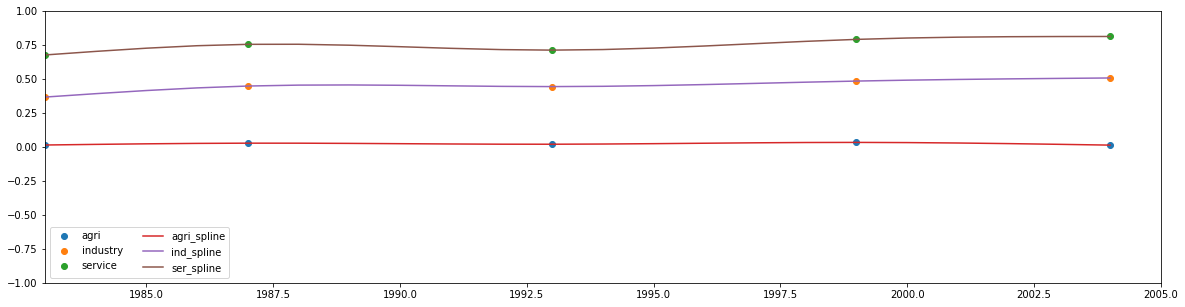

In [46]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
x = [1983, 1987, 1993, 1999, 2004]
human_cap = human_cap.dropna()
y_agri = human_cap.human_cap_agri
y_ind = human_cap.human_cap_ind
y_ser = human_cap.human_cap_ser
cs_agri = CubicSpline(x, y_agri, bc_type='natural')
cs_ind = CubicSpline(x, y_ind, bc_type='natural')
cs_ser = CubicSpline(x, y_ser, bc_type='natural')
xs = np.arange(1983, 2005, 1)
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(x, y_agri, 'o', label='agri')
ax.plot(x, y_ind, 'o', label='industry')
ax.plot(x, y_ser, 'o', label='service')
ax.plot(xs, cs_agri(xs), label="agri_spline")
ax.plot(xs, cs_ind(xs), label="ind_spline")
ax.plot(xs, cs_ser(xs), label="ser_spline")
ax.set_xlim(1983, 2005)
ax.set_ylim(-1, 1)
ax.plot(title="cubic spline results")
ax.legend(loc='lower left', ncol=2)
plt.show()

In [47]:
cs_agri(xs).mean(), cs_ind(xs).mean(), cs_ser(xs).mean()

(0.024105258705391118, 0.45635864581386654, 0.7525706464969674)

In [48]:
cs_ind(xs).mean() / cs_agri(xs).mean(), cs_ser(xs).mean() / cs_agri(xs).mean()

(18.93191238440442, 31.220185424878085)

In [49]:
human_cap_agri = []
human_cap_ind = []
human_cap_ser = []


for year in [1983, 1987, 1993, 1999, 2004]:
          Y = data_reg_1.loc[data_reg_1.year == year][['incwage', 'indgen_Agriculture','indgen_Industry', 'indgen_service']]
          X = data_reg_1.loc[data_reg_1.year == year][['perwt', 'sex_male','sex_female', 'sex_unknown','educin', 'yr_exp', 'yr_exp_squared', 'indgen_Agriculture','indgen_Industry', 'indgen_service']]

          # mincer return for agriculture 
          data_reg_agri = X.loc[X.indgen_Agriculture == 1]
          Y_agri = Y.loc[Y.indgen_Agriculture == 1]['incwage']
          X_agri = data_reg_agri[['sex_male', 'sex_female', 'sex_unknown','educin', 'yr_exp', 'yr_exp_squared']]
          wregr_agri = linear_model.LinearRegression()
          wregr_agri.fit(X_agri, np.log(Y_agri), sample_weight = data_reg_agri.perwt)      

          X_agri['human_capital'] = X_agri['educin'] * wregr_agri.coef_[4]
          human_cap_agri.append(X_agri['human_capital'].mean())

          # mincer return for Industry 
          data_reg_ind = X.loc[X.indgen_Industry == 1]
          Y_ind = Y.loc[Y.indgen_Industry == 1]['incwage']
          X_ind = data_reg_ind[['sex_male', 'sex_female', 'sex_unknown','educin', 'yr_exp', 'yr_exp_squared']]
          wregr_ind = linear_model.LinearRegression()
          wregr_ind.fit(X_ind, np.log(Y_ind), sample_weight = data_reg_ind.perwt) 

          X_ind['human_capital']= X_ind['educin'] * wregr_ind.coef_[4]
          human_cap_ind.append(X_ind['human_capital'].mean())

          # mincer return for service 
          data_reg_service = X.loc[X.indgen_service == 1]
          Y_ser = Y.loc[Y.indgen_service == 1]['incwage']
          X_ser = data_reg_service[['sex_male', 'sex_female', 'sex_unknown','educin', 'yr_exp', 'yr_exp_squared']]
          wregr_service = linear_model.LinearRegression()
          wregr_service.fit(X_ser, np.log(Y_ser), sample_weight = data_reg_service.perwt) 
          
          X_ser['human_capital'] = X_ser['educin'] * wregr_service.coef_[4]
          human_cap_ser.append(X_ser['human_capital'].mean())

human_cap = pd.DataFrame(index = [1983, 1987, 1993, 1999, 2004], columns=['human_cap_agri', 'human_cap_ind', 'human_cap_ser'])
human_cap.human_cap_agri = human_cap_agri
human_cap.human_cap_ind = human_cap_ind
human_cap.human_cap_ser = human_cap_ser

human_cap['ind/agri'] = human_cap.human_cap_ind / human_cap.human_cap_agri 
human_cap['ser/agri'] = human_cap.human_cap_ser / human_cap.human_cap_agri 
human_cap

/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2847/1810212900.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_agri['human_capital'] = X_agri['educin'] * wregr_agri.coef_[4]
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2847/1810212900.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_ind['human_capital']= X_ind['educin'] * wregr_ind.coef_[4]
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2847/1810212900.py:37: SettingWithCopyWarning: 
A value is trying to be

,human_cap_agri,human_cap_ind,human_cap_ser,ind/agri,ser/agri
1983,0.00,0.25,0.36,190.96,273.60
1987,0.01,0.35,0.41,31.74,37.00
1993,0.01,0.32,0.45,22.52,31.29
1999,0.02,0.33,0.48,14.15,20.64
2004,0.03,0.32,0.45,11.48,16.25


In [50]:
print(human_cap.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  human\_cap\_agri &  human\_cap\_ind &  human\_cap\_ser &  ind/agri &  ser/agri \\
\midrule
1983 &            0.00 &           0.25 &           0.36 &    190.96 &    273.60 \\
1987 &            0.01 &           0.35 &           0.41 &     31.74 &     37.00 \\
1993 &            0.01 &           0.32 &           0.45 &     22.52 &     31.29 \\
1999 &            0.02 &           0.33 &           0.48 &     14.15 &     20.64 \\
2004 &            0.03 &           0.32 &           0.45 &     11.48 &     16.25 \\
\bottomrule
\end{tabular}



In [51]:
data_reg_1 = pd.get_dummies(data_india, columns=['indgen', 'sex'], drop_first=False)
#data_reg_1.educin = data_reg_1.educin.astype('int64')
data_reg_1.age = data_reg_1.age.astype('int64')
data_reg_1.year = data_reg_1.year.astype('int64')
data_reg_1.info()

# transforming variables in educin 
data_reg_1['educin'].replace(to_replace=['illiterate, less than primary'], value = 0 , inplace=True)
data_reg_1['educin'].replace(to_replace=['literate, less than primary'], value = 2 , inplace=True)
data_reg_1['educin'].replace(to_replace=['primary'], value = 5 , inplace=True)
data_reg_1['educin'].replace(to_replace=['middle'], value = 8 , inplace=True)
data_reg_1['educin'].replace(to_replace=['secondary'], value = 11 , inplace=True)
data_reg_1['educin'].replace(to_replace=['higher secondary'], value = 11 , inplace=True)
data_reg_1['educin'].replace(to_replace=['undergraduate or graduate'], value = 15 , inplace=True)
data_reg_1['educin'].replace(to_replace=['unknown'], value = 99 , inplace=True)

data_reg_1.educin = data_reg_1.educin.astype('int64')
data_reg_1.age = data_reg_1.age.astype('int64')

data_reg_1['exp_1'] = data_reg_1.age - 18
data_reg_1['exp_2'] = data_reg_1.age - data_reg_1.educin - 6
data_reg_1['yr_exp'] = data_reg_1[['exp_1', 'exp_2']].min(axis=1)
data_reg_1['yr_exp_squared'] = data_reg_1['yr_exp']**2

# Weekly income 
data_reg_1 = data_reg_1.loc[data_reg_1.educin != 99]
data_reg_1 = data_reg_1[data_reg_1['incwage'] != 0]

Y = data_reg_1[['year', 'geo1_in', 'incwage']]
X = data_reg_1[['year', 'geo1_in', 'sex_female', 'sex_unknown','educin', 'yr_exp', 'yr_exp_squared', 'indgen_Agriculture','indgen_Industry', 'indgen_service']]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1146690 entries, 0 to 1968038
Data columns (total 23 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   country             1146690 non-null  category
 1   year                1146690 non-null  int64   
 2   sample              1146690 non-null  category
 3   serial              1146690 non-null  int32   
 4   hhwt                1146690 non-null  float64 
 5   geo1_in             1146690 non-null  category
 6   pernum              1146690 non-null  int8    
 7   perwt               1146690 non-null  float64 
 8   age                 1146690 non-null  int64   
 9   edattain            1146690 non-null  category
 10  edattaind           1146690 non-null  category
 11  educin              1146690 non-null  category
 12  empstat             1146690 non-null  category
 13  empstatd            1146690 non-null  category
 14  classwk             1146690 non-null  category
 15

In [52]:
human_cap_agri = []
human_cap_ind = []
human_cap_ser = []

for year in [1983, 1987, 1993, 1999, 2004]:
          Y = data_reg_1.loc[data_reg_1.year == year][['geo1_in', 'incwage', 'indgen_Agriculture','indgen_Industry', 'indgen_service']]
          X = data_reg_1.loc[data_reg_1.year == year][['geo1_in', 'sex_male','sex_female', 'sex_unknown','educin', 'yr_exp', 'yr_exp_squared', 'indgen_Agriculture','indgen_Industry', 'indgen_service']]

          # mincer return for agriculture 
          data_reg_agri = X.loc[X.indgen_Agriculture == 1]
          Y_agri = Y.loc[Y.indgen_Agriculture == 1]['incwage']
          X_agri = data_reg_agri[['sex_male', 'sex_female', 'sex_unknown','educin', 'yr_exp', 'yr_exp_squared']]
          reg_agri = sm.OLS(endog= np.log(Y_agri), exog= sm.add_constant(X_agri), cov_type = 'cluster', cov_kwds = {'groups': 'geo1_in'})
          result_agri = reg_agri.fit()

          X_agri['human_capital'] = X_agri['educin'] * result_agri.params[4]
          human_cap_agri.append(X_agri['human_capital'].mean())

          # mincer return for Industry 
          data_reg_ind = X.loc[X.indgen_Industry == 1]
          Y_ind = Y.loc[Y.indgen_Industry == 1]['incwage']
          X_ind = data_reg_ind[['sex_male', 'sex_female', 'sex_unknown','educin', 'yr_exp', 'yr_exp_squared']]
          reg_ind = sm.OLS(endog= np.log(Y_ind), exog= sm.add_constant(X_ind), cov_type = 'cluster', cov_kwds = {'groups': 'geo1_in'})
          result_ind = reg_ind.fit()

          X_ind['human_capital']= X_ind['educin'] * result_ind.params[4]
          human_cap_ind.append(X_ind['human_capital'].mean())

          # mincer return for service 
          data_reg_service = X.loc[X.indgen_service == 1]
          Y_ser = Y.loc[Y.indgen_service == 1]['incwage']
          X_ser = data_reg_service[['sex_male', 'sex_female', 'sex_unknown','educin', 'yr_exp', 'yr_exp_squared']]
          reg_service = sm.OLS(endog= np.log(Y_ser), exog= sm.add_constant(X_ser), cov_type = 'cluster', cov_kwds = {'groups': 'geo1_in'})
          result_service = reg_service.fit()
          
          X_ser['human_capital'] = X_ser['educin'] * result_service.params[4]
          human_cap_ser.append(X_ser['human_capital'].mean())

human_cap = pd.DataFrame(index = [1983, 1987, 1993, 1999, 2004], columns=['human_cap_agri', 'human_cap_ind', 'human_cap_ser'])
human_cap.human_cap_agri = human_cap_agri
human_cap.human_cap_ind = human_cap_ind
human_cap.human_cap_ser = human_cap_ser

human_cap['ind/agri'] = human_cap.human_cap_ind / human_cap.human_cap_agri 
human_cap['ser/agri'] = human_cap.human_cap_ser / human_cap.human_cap_agri 
human_cap

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2847/338363187.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_agri['human_capital'] = X_agri['educin'] * result_agri.params[4]
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2847/338363187.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,human_cap_agri,human_cap_ind,human_cap_ser,ind/agri,ser/agri
1983,0.03,0.37,0.67,13.01,23.41
1987,0.05,0.49,0.78,10.14,16.06
1993,0.05,0.47,0.75,9.57,15.08
1999,0.07,0.53,0.84,7.50,11.95
2004,0.08,0.55,0.85,7.09,11.03


In [53]:
data_reg_1 = pd.get_dummies(data_india, columns=['geo1_in','indgen', 'sex'], drop_first=False)
#data_reg_1.educin = data_reg_1.educin.astype('int64')
data_reg_1.age = data_reg_1.age.astype('int64')
data_reg_1.year = data_reg_1.year.astype('int64')
data_reg_1.info()

# transforming variables in educin 
data_reg_1['educin'].replace(to_replace=['illiterate, less than primary'], value = 0 , inplace=True)
data_reg_1['educin'].replace(to_replace=['literate, less than primary'], value = 2 , inplace=True)
data_reg_1['educin'].replace(to_replace=['primary'], value = 5 , inplace=True)
data_reg_1['educin'].replace(to_replace=['middle'], value = 8 , inplace=True)
data_reg_1['educin'].replace(to_replace=['secondary'], value = 11 , inplace=True)
data_reg_1['educin'].replace(to_replace=['higher secondary'], value = 11 , inplace=True)
data_reg_1['educin'].replace(to_replace=['undergraduate or graduate'], value = 15 , inplace=True)
data_reg_1['educin'].replace(to_replace=['unknown'], value = 99 , inplace=True)

data_reg_1.educin = data_reg_1.educin.astype('int64')
data_reg_1.age = data_reg_1.age.astype('int64')

data_reg_1['exp_1'] = data_reg_1.age - 18
data_reg_1['exp_2'] = data_reg_1.age - data_reg_1.educin - 6
data_reg_1['yr_exp'] = data_reg_1[['exp_1', 'exp_2']].min(axis=1)
data_reg_1['yr_exp_squared'] = data_reg_1['yr_exp']**2

# Weekly income 
data_reg_1 = data_reg_1.loc[data_reg_1.educin != 99]
data_reg_1 = data_reg_1[data_reg_1['incwage'] != 0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1146690 entries, 0 to 1968038
Data columns (total 53 columns):
 #   Column                                Non-Null Count    Dtype   
---  ------                                --------------    -----   
 0   country                               1146690 non-null  category
 1   year                                  1146690 non-null  int64   
 2   sample                                1146690 non-null  category
 3   serial                                1146690 non-null  int32   
 4   hhwt                                  1146690 non-null  float64 
 5   pernum                                1146690 non-null  int8    
 6   perwt                                 1146690 non-null  float64 
 7   age                                   1146690 non-null  int64   
 8   edattain                              1146690 non-null  category
 9   edattaind                             1146690 non-null  category
 10  educin                                1146

In [54]:
data_reg_1.columns

Index(['country', 'year', 'sample', 'serial', 'hhwt', 'pernum', 'perwt', 'age', 'edattain', 'edattaind', 'educin', 'empstat', 'empstatd', 'classwk', 'classwkd', 'incwage', 'geo1_in_jammu and kashmir', 'geo1_in_himachal pradesh', 'geo1_in_punjab', 'geo1_in_chandigarh', 'geo1_in_haryana', 'geo1_in_delhi', 'geo1_in_rajasthan', 'geo1_in_uttar pradesh, uttaranchal', 'geo1_in_bihar, jharkhand', 'geo1_in_sikkim', 'geo1_in_arunachal pradesh', 'geo1_in_nagaland', 'geo1_in_manipur', 'geo1_in_mizoram', 'geo1_in_tripura', 'geo1_in_meghalaya', 'geo1_in_assam', 'geo1_in_west bengal', 'geo1_in_orissa', 'geo1_in_madhya pradesh, chhattisgarh', 'geo1_in_gujarat', 'geo1_in_dadra and nagar haveli', 'geo1_in_maharashtra', 'geo1_in_andhra pradesh', 'geo1_in_karnataka', 'geo1_in_goa, daman and diu', 'geo1_in_lakshadweep', 'geo1_in_kerala', 'geo1_in_tamil nadu', 'geo1_in_pondicherry', 'geo1_in_andaman and nicobar islands', 'indgen_Agriculture', 'indgen_Industry', 'indgen_service', 'sex_male', 'sex_female',
  

In [55]:
Y = data_reg_1.loc[data_reg_1.year == 2004][['incwage', 'indgen_Agriculture','indgen_Industry', 'indgen_service']]
X = data_reg_1.loc[data_reg_1.year == 2004][['sex_male','sex_female', 'sex_unknown','educin', 'yr_exp', 'yr_exp_squared', 'indgen_Agriculture','indgen_Industry', 'indgen_service','geo1_in_jammu and kashmir', 'geo1_in_himachal pradesh', 'geo1_in_punjab', 'geo1_in_chandigarh', 'geo1_in_haryana', 'geo1_in_delhi', 'geo1_in_rajasthan', 'geo1_in_uttar pradesh, uttaranchal', 'geo1_in_bihar, jharkhand', 'geo1_in_sikkim', 'geo1_in_arunachal pradesh', 'geo1_in_nagaland', 'geo1_in_manipur', 'geo1_in_mizoram', 'geo1_in_tripura', 'geo1_in_meghalaya', 'geo1_in_assam', 'geo1_in_west bengal', 'geo1_in_orissa', 'geo1_in_madhya pradesh, chhattisgarh', 'geo1_in_gujarat', 'geo1_in_dadra and nagar haveli', 'geo1_in_maharashtra', 'geo1_in_andhra pradesh', 'geo1_in_karnataka', 'geo1_in_goa, daman and diu', 'geo1_in_lakshadweep', 'geo1_in_kerala', 'geo1_in_tamil nadu', 'geo1_in_pondicherry', 'geo1_in_andaman and nicobar islands']]

# mincer return for agriculture 
data_reg_agri = X.loc[X.indgen_Agriculture == 1]
Y_agri = Y.loc[Y.indgen_Agriculture == 1]['incwage']
X_agri = data_reg_agri[['sex_male', 'sex_female', 'sex_unknown','educin', 'yr_exp', 'yr_exp_squared', 'geo1_in_jammu and kashmir', 'geo1_in_himachal pradesh', 'geo1_in_punjab', 'geo1_in_chandigarh', 'geo1_in_haryana', 'geo1_in_delhi', 'geo1_in_rajasthan', 'geo1_in_uttar pradesh, uttaranchal', 'geo1_in_bihar, jharkhand', 'geo1_in_sikkim', 'geo1_in_arunachal pradesh', 'geo1_in_nagaland', 'geo1_in_manipur', 'geo1_in_mizoram', 'geo1_in_tripura', 'geo1_in_meghalaya', 'geo1_in_assam', 'geo1_in_west bengal', 'geo1_in_orissa', 'geo1_in_madhya pradesh, chhattisgarh', 'geo1_in_gujarat', 'geo1_in_dadra and nagar haveli', 'geo1_in_maharashtra', 'geo1_in_andhra pradesh', 'geo1_in_karnataka', 'geo1_in_goa, daman and diu', 'geo1_in_lakshadweep', 'geo1_in_kerala', 'geo1_in_tamil nadu', 'geo1_in_pondicherry', 'geo1_in_andaman and nicobar islands']]
reg_agri = sm.OLS(endog= np.log(Y_agri), exog= sm.add_constant(X_agri), cov_type = 'cluster', cov_kwds = {'groups': 'geo1_in'})
result_agri = reg_agri.fit()

print(result_agri.summary())

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                incwage   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     342.4
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:56:43   Log-Likelihood:                -19028.
No. Observations:               22759   AIC:                         3.812e+04
Df Residuals:                   22725   BIC:                         3.840e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [56]:
Y = data_reg_1.loc[data_reg_1.year == 2004][['incwage', 'indgen_Agriculture','indgen_Industry', 'indgen_service']]
X = data_reg_1.loc[data_reg_1.year == 2004][['sex_male','sex_female', 'sex_unknown','educin', 'yr_exp', 'yr_exp_squared', 'indgen_Agriculture','indgen_Industry', 'indgen_service']]

# mincer return for agriculture 
data_reg_agri = X.loc[X.indgen_Agriculture == 1]
Y_agri = Y.loc[Y.indgen_Agriculture == 1]['incwage']
X_agri = data_reg_agri[['sex_male', 'sex_female', 'sex_unknown','educin', 'yr_exp', 'yr_exp_squared']]
reg_agri = sm.OLS(endog= np.log(Y_agri), exog= sm.add_constant(X_agri), cov_type = 'cluster', cov_kwds = {'groups': 'geo1_in'})
result_agri = reg_agri.fit()

print(result_agri.summary())

                            OLS Regression Results                            
Dep. Variable:                incwage   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     1287.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:56:44   Log-Likelihood:                -21299.
No. Observations:               22759   AIC:                         4.261e+04
Df Residuals:                   22754   BIC:                         4.265e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.3666      0.008    427.

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [57]:
data_reg_1 = pd.get_dummies(data_india, columns=['geo1_in','indgen', 'sex'], drop_first=False)
#data_reg_1.educin = data_reg_1.educin.astype('int64')
data_reg_1.age = data_reg_1.age.astype('int64')
data_reg_1.year = data_reg_1.year.astype('int64')
data_reg_1.info()

# transforming variables in educin 
data_reg_1['educin'].replace(to_replace=['illiterate, less than primary'], value = 0 , inplace=True)
data_reg_1['educin'].replace(to_replace=['literate, less than primary'], value = 2 , inplace=True)
data_reg_1['educin'].replace(to_replace=['primary'], value = 5 , inplace=True)
data_reg_1['educin'].replace(to_replace=['middle'], value = 8 , inplace=True)
data_reg_1['educin'].replace(to_replace=['secondary'], value = 11 , inplace=True)
data_reg_1['educin'].replace(to_replace=['higher secondary'], value = 11 , inplace=True)
data_reg_1['educin'].replace(to_replace=['undergraduate or graduate'], value = 15 , inplace=True)
data_reg_1['educin'].replace(to_replace=['unknown'], value = 99 , inplace=True)

data_reg_1.educin = data_reg_1.educin.astype('int64')
data_reg_1.age = data_reg_1.age.astype('int64')

data_reg_1['exp_1'] = data_reg_1.age - 18
data_reg_1['exp_2'] = data_reg_1.age - data_reg_1.educin - 6
data_reg_1['yr_exp'] = data_reg_1[['exp_1', 'exp_2']].min(axis=1)
data_reg_1['yr_exp_squared'] = data_reg_1['yr_exp']**2

# Weekly income 
data_reg_1 = data_reg_1.loc[data_reg_1.educin != 99]
data_reg_1 = data_reg_1[data_reg_1['incwage'] != 0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1146690 entries, 0 to 1968038
Data columns (total 53 columns):
 #   Column                                Non-Null Count    Dtype   
---  ------                                --------------    -----   
 0   country                               1146690 non-null  category
 1   year                                  1146690 non-null  int64   
 2   sample                                1146690 non-null  category
 3   serial                                1146690 non-null  int32   
 4   hhwt                                  1146690 non-null  float64 
 5   pernum                                1146690 non-null  int8    
 6   perwt                                 1146690 non-null  float64 
 7   age                                   1146690 non-null  int64   
 8   edattain                              1146690 non-null  category
 9   edattaind                             1146690 non-null  category
 10  educin                                1146

In [58]:
data_reg_1.columns

Index(['country', 'year', 'sample', 'serial', 'hhwt', 'pernum', 'perwt', 'age', 'edattain', 'edattaind', 'educin', 'empstat', 'empstatd', 'classwk', 'classwkd', 'incwage', 'geo1_in_jammu and kashmir', 'geo1_in_himachal pradesh', 'geo1_in_punjab', 'geo1_in_chandigarh', 'geo1_in_haryana', 'geo1_in_delhi', 'geo1_in_rajasthan', 'geo1_in_uttar pradesh, uttaranchal', 'geo1_in_bihar, jharkhand', 'geo1_in_sikkim', 'geo1_in_arunachal pradesh', 'geo1_in_nagaland', 'geo1_in_manipur', 'geo1_in_mizoram', 'geo1_in_tripura', 'geo1_in_meghalaya', 'geo1_in_assam', 'geo1_in_west bengal', 'geo1_in_orissa', 'geo1_in_madhya pradesh, chhattisgarh', 'geo1_in_gujarat', 'geo1_in_dadra and nagar haveli', 'geo1_in_maharashtra', 'geo1_in_andhra pradesh', 'geo1_in_karnataka', 'geo1_in_goa, daman and diu', 'geo1_in_lakshadweep', 'geo1_in_kerala', 'geo1_in_tamil nadu', 'geo1_in_pondicherry', 'geo1_in_andaman and nicobar islands', 'indgen_Agriculture', 'indgen_Industry', 'indgen_service', 'sex_male', 'sex_female',
  

In [59]:
human_cap_agri = []
human_cap_ind = []
human_cap_ser = []

for year in [1983, 1987, 1993, 1999, 2004]:
          Y = data_reg_1.loc[data_reg_1.year == year][['incwage', 'indgen_Agriculture', 'indgen_Industry', 'indgen_service']]
          X = data_reg_1.loc[data_reg_1.year == year][['sex_male', 'sex_female', 'sex_unknown', 'educin', 'yr_exp', 'yr_exp_squared', 'indgen_Agriculture','indgen_Industry', 'indgen_service','geo1_in_jammu and kashmir', 'geo1_in_himachal pradesh', 'geo1_in_punjab', 'geo1_in_chandigarh', 'geo1_in_haryana', 'geo1_in_delhi', 'geo1_in_rajasthan', 'geo1_in_uttar pradesh, uttaranchal', 'geo1_in_bihar, jharkhand', 'geo1_in_sikkim', 'geo1_in_arunachal pradesh', 'geo1_in_nagaland', 'geo1_in_manipur', 'geo1_in_mizoram', 'geo1_in_tripura', 'geo1_in_meghalaya', 'geo1_in_assam', 'geo1_in_west bengal', 'geo1_in_orissa', 'geo1_in_madhya pradesh, chhattisgarh', 'geo1_in_gujarat', 'geo1_in_dadra and nagar haveli', 'geo1_in_maharashtra', 'geo1_in_andhra pradesh', 'geo1_in_karnataka', 'geo1_in_goa, daman and diu', 'geo1_in_lakshadweep', 'geo1_in_kerala', 'geo1_in_tamil nadu', 'geo1_in_pondicherry', 'geo1_in_andaman and nicobar islands']]
          
          # interaction terms 
          X['indgen_agri_yrschool'] = X['indgen_Agriculture'] * X['educin']
          X['indgen_ind_yrschool'] = X['indgen_Industry'] * X['educin']
          X['indgen_ser_yrschool'] = X['indgen_service'] * X['educin']

          X_reg = X[['indgen_Agriculture', 'indgen_Industry', 'indgen_service', 
          'geo1_in_jammu and kashmir', 'geo1_in_himachal pradesh', 'geo1_in_punjab', 'geo1_in_chandigarh', 'geo1_in_haryana', 'geo1_in_delhi', 'geo1_in_rajasthan', 'geo1_in_uttar pradesh, uttaranchal', 'geo1_in_bihar, jharkhand', 'geo1_in_sikkim', 'geo1_in_arunachal pradesh', 'geo1_in_nagaland', 'geo1_in_manipur', 'geo1_in_mizoram', 'geo1_in_tripura', 'geo1_in_meghalaya', 'geo1_in_assam', 'geo1_in_west bengal', 'geo1_in_orissa', 'geo1_in_madhya pradesh, chhattisgarh', 'geo1_in_gujarat', 'geo1_in_dadra and nagar haveli', 'geo1_in_maharashtra', 'geo1_in_andhra pradesh', 'geo1_in_karnataka', 'geo1_in_goa, daman and diu', 'geo1_in_lakshadweep', 'geo1_in_kerala', 'geo1_in_tamil nadu', 'geo1_in_pondicherry', 'geo1_in_andaman and nicobar islands', 
          'sex_male', 'sex_female', 'sex_unknown',
          'indgen_agri_yrschool', 'indgen_ind_yrschool', 'indgen_ser_yrschool', 
          'yr_exp', 'yr_exp_squared'
          ]]

          reg = sm.OLS(endog= np.log(Y.incwage), exog= sm.add_constant(X_reg), cov_type = 'HC0')
          result = reg.fit()

          X['human_capital_agri'] = X.loc[X.indgen_Agriculture == 1]['educin'] * result.params[38]
          human_cap_agri.append(X['human_capital_agri'].mean())
          
          X['human_capital_ind']= X.loc[X.indgen_Industry == 1]['educin'] * result.params[39]
          human_cap_ind.append(X['human_capital_ind'].mean())

          X['human_capital_ser'] = X.loc[X.indgen_service == 1]['educin'] * result.params[40]
          human_cap_ser.append(X['human_capital_ser'].mean())

human_cap = pd.DataFrame(index = [1983, 1987, 1993, 1999, 2004], columns=['human_cap_agri', 'human_cap_ind', 'human_cap_ser'])
human_cap.human_cap_agri = human_cap_agri
human_cap.human_cap_ind = human_cap_ind
human_cap.human_cap_ser = human_cap_ser

human_cap['ind/agri'] = human_cap.human_cap_ind / human_cap.human_cap_agri 
human_cap['ser/agri'] = human_cap.human_cap_ser / human_cap.human_cap_agri 
human_cap

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,human_cap_agri,human_cap_ind,human_cap_ser,ind/agri,ser/agri
1983,0.03,0.40,0.65,14.07,22.90
1987,0.06,0.51,0.75,8.49,12.51
1993,0.05,0.50,0.73,9.13,13.30
1999,0.08,0.53,0.82,6.35,9.75
2004,0.10,0.55,0.81,5.61,8.27


In [60]:
human_cap_agri = []
human_cap_ind = []
human_cap_ser = []

# without state control

for year in [1983, 1987, 1993, 1999, 2004]:
          Y = data_reg_1.loc[data_reg_1.year == year][['incwage', 'indgen_Agriculture', 'indgen_Industry', 'indgen_service']]
          X = data_reg_1.loc[data_reg_1.year == year][['sex_male', 'sex_female', 'sex_unknown', 'educin', 'yr_exp', 'yr_exp_squared', 'indgen_Agriculture','indgen_Industry', 'indgen_service','geo1_in_jammu and kashmir', 'geo1_in_himachal pradesh', 'geo1_in_punjab', 'geo1_in_chandigarh', 'geo1_in_haryana', 'geo1_in_delhi', 'geo1_in_rajasthan', 'geo1_in_uttar pradesh, uttaranchal', 'geo1_in_bihar, jharkhand', 'geo1_in_sikkim', 'geo1_in_arunachal pradesh', 'geo1_in_nagaland', 'geo1_in_manipur', 'geo1_in_mizoram', 'geo1_in_tripura', 'geo1_in_meghalaya', 'geo1_in_assam', 'geo1_in_west bengal', 'geo1_in_orissa', 'geo1_in_madhya pradesh, chhattisgarh', 'geo1_in_gujarat', 'geo1_in_dadra and nagar haveli', 'geo1_in_maharashtra', 'geo1_in_andhra pradesh', 'geo1_in_karnataka', 'geo1_in_goa, daman and diu', 'geo1_in_lakshadweep', 'geo1_in_kerala', 'geo1_in_tamil nadu', 'geo1_in_pondicherry', 'geo1_in_andaman and nicobar islands']]
          
          # interaction terms 
          X['indgen_agri_yrschool'] = X['indgen_Agriculture'] * X['educin']
          X['indgen_ind_yrschool'] = X['indgen_Industry'] * X['educin']
          X['indgen_ser_yrschool'] = X['indgen_service'] * X['educin']

          X_reg = X[['indgen_Agriculture', 'indgen_Industry', 'indgen_service', 
          'sex_male', 'sex_female', 'sex_unknown',
          'indgen_agri_yrschool', 'indgen_ind_yrschool', 'indgen_ser_yrschool', 
          'yr_exp', 'yr_exp_squared'
          ]]

          reg = sm.OLS(endog= np.log(Y.incwage), exog= sm.add_constant(X_reg), cov_type = 'HC0')
          result = reg.fit()

          X['human_capital_agri'] = X.loc[X.indgen_Agriculture == 1]['educin'] * result.params[7]
          human_cap_agri.append(X['human_capital_agri'].mean())
          
          X['human_capital_ind']= X.loc[X.indgen_Industry == 1]['educin'] * result.params[8]
          human_cap_ind.append(X['human_capital_ind'].mean())

          X['human_capital_ser'] = X.loc[X.indgen_service == 1]['educin'] * result.params[9]
          human_cap_ser.append(X['human_capital_ser'].mean())

human_cap = pd.DataFrame(index = [1983, 1987, 1993, 1999, 2004], columns=['human_cap_agri', 'human_cap_ind', 'human_cap_ser'])
human_cap.human_cap_agri = human_cap_agri
human_cap.human_cap_ind = human_cap_ind
human_cap.human_cap_ser = human_cap_ser

human_cap['ind/agri'] = human_cap.human_cap_ind / human_cap.human_cap_agri 
human_cap['ser/agri'] = human_cap.human_cap_ser / human_cap.human_cap_agri 
human_cap

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,human_cap_agri,human_cap_ind,human_cap_ser,ind/agri,ser/agri
1983,0.03,0.40,0.67,11.82,19.53
1987,0.06,0.52,0.77,8.50,12.63
1993,0.06,0.51,0.75,8.18,12.01
1999,0.09,0.54,0.84,5.78,8.93
2004,0.11,0.57,0.84,5.06,7.47


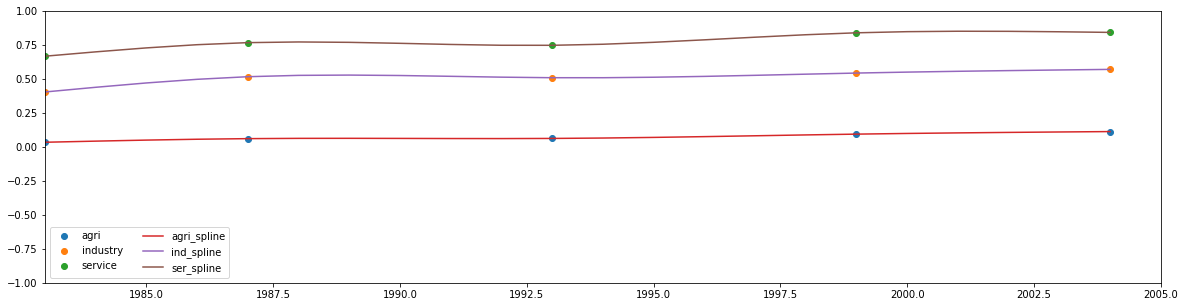

In [61]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
x = [1983, 1987, 1993, 1999, 2004]
human_cap = human_cap.dropna()
y_agri = human_cap.human_cap_agri
y_ind = human_cap.human_cap_ind
y_ser = human_cap.human_cap_ser
cs_agri = CubicSpline(x, y_agri, bc_type='natural')
cs_ind = CubicSpline(x, y_ind, bc_type='natural')
cs_ser = CubicSpline(x, y_ser, bc_type='natural')
xs = np.arange(1983, 2005, 1)
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(x, y_agri, 'o', label='agri')
ax.plot(x, y_ind, 'o', label='industry')
ax.plot(x, y_ser, 'o', label='service')
ax.plot(xs, cs_agri(xs), label="agri_spline")
ax.plot(xs, cs_ind(xs), label="ind_spline")
ax.plot(xs, cs_ser(xs), label="ser_spline")
ax.set_xlim(1983, 2005)
ax.set_ylim(-1, 1)
ax.plot(title="cubic spline results")
ax.legend(loc='lower left', ncol=2)
plt.show()

In [62]:
cs_ind(xs).mean() / cs_agri(xs).mean(), cs_ser(xs).mean() / cs_agri(xs).mean()

(7.023260418857482, 10.59214744291617)

In [63]:
human_cap_agri = []
human_cap_ind = []
human_cap_ser = []

for year in [1983, 1987, 1993, 1999, 2004]:
          Y = data_reg_1.loc[data_reg_1.year == year][['incwage', 'indgen_Agriculture', 'indgen_Industry', 'indgen_service']]
          X = data_reg_1.loc[data_reg_1.year == year][['perwt','sex_male', 'sex_female', 'sex_unknown', 'educin', 'yr_exp', 'yr_exp_squared', 'indgen_Agriculture','indgen_Industry', 'indgen_service','geo1_in_jammu and kashmir', 'geo1_in_himachal pradesh', 'geo1_in_punjab', 'geo1_in_chandigarh', 'geo1_in_haryana', 'geo1_in_delhi', 'geo1_in_rajasthan', 'geo1_in_uttar pradesh, uttaranchal', 'geo1_in_bihar, jharkhand', 'geo1_in_sikkim', 'geo1_in_arunachal pradesh', 'geo1_in_nagaland', 'geo1_in_manipur', 'geo1_in_mizoram', 'geo1_in_tripura', 'geo1_in_meghalaya', 'geo1_in_assam', 'geo1_in_west bengal', 'geo1_in_orissa', 'geo1_in_madhya pradesh, chhattisgarh', 'geo1_in_gujarat', 'geo1_in_dadra and nagar haveli', 'geo1_in_maharashtra', 'geo1_in_andhra pradesh', 'geo1_in_karnataka', 'geo1_in_goa, daman and diu', 'geo1_in_lakshadweep', 'geo1_in_kerala', 'geo1_in_tamil nadu', 'geo1_in_pondicherry', 'geo1_in_andaman and nicobar islands']]
          
          # interaction terms 
          X['indgen_agri_yrschool'] = X['indgen_Agriculture'] * X['educin']
          X['indgen_ind_yrschool'] = X['indgen_Industry'] * X['educin']
          X['indgen_ser_yrschool'] = X['indgen_service'] * X['educin']

          X_reg = X[['indgen_Agriculture', 'indgen_Industry', 'indgen_service', 
          'sex_male', 'sex_female', 'sex_unknown',
          'indgen_agri_yrschool', 'indgen_ind_yrschool', 'indgen_ser_yrschool', 
          'yr_exp', 'yr_exp_squared'
          ]]

          #reg = sm.OLS(endog= np.log(Y.incwage), exog= sm.add_constant(X_reg), cov_type = 'HC0')
          #result = reg.fit()

          wregr = linear_model.LinearRegression()
          wregr.fit(X_reg, np.log(Y.incwage), sample_weight = X.perwt) 

          X['human_capital_agri'] = (X.loc[X.indgen_Agriculture == 1]['educin'] * wregr.coef_[6]) + (X.loc[X.indgen_Agriculture == 1]['yr_exp'] * wregr.coef_[9]) + (X.loc[X.indgen_Agriculture == 1]['yr_exp_squared'] * wregr.coef_[10])
          human_cap_agri.append(X['human_capital_agri'].mean())
          
          X['human_capital_ind']= (X.loc[X.indgen_Industry == 1]['educin'] * wregr.coef_[7]) + (X.loc[X.indgen_Industry == 1]['yr_exp'] * wregr.coef_[9]) + (X.loc[X.indgen_Industry == 1]['yr_exp_squared'] * wregr.coef_[10])
          human_cap_ind.append(X['human_capital_ind'].mean())

          X['human_capital_ser'] = (X.loc[X.indgen_service == 1]['educin'] * wregr.coef_[8]) + (X.loc[X.indgen_service == 1]['yr_exp'] * wregr.coef_[9]) + (X.loc[X.indgen_service == 1]['yr_exp_squared'] * wregr.coef_[10])
          human_cap_ser.append(X['human_capital_ser'].mean())

human_cap = pd.DataFrame(index = [1983, 1987, 1993, 1999, 2004], columns=['human_cap_agri', 'human_cap_ind', 'human_cap_ser'])
human_cap.human_cap_agri = human_cap_agri
human_cap.human_cap_ind = human_cap_ind
human_cap.human_cap_ser = human_cap_ser

human_cap['ind/agri'] = human_cap.human_cap_ind / human_cap.human_cap_agri 
human_cap['ser/agri'] = human_cap.human_cap_ser / human_cap.human_cap_agri 
human_cap

,human_cap_agri,human_cap_ind,human_cap_ser,ind/agri,ser/agri
1983,0.26,0.63,0.93,2.38,3.54
1987,0.43,0.87,1.18,2.02,2.74
1993,0.34,0.79,1.04,2.29,3.03
1999,0.42,0.87,1.18,2.07,2.81
2004,0.46,0.92,1.23,2.03,2.70


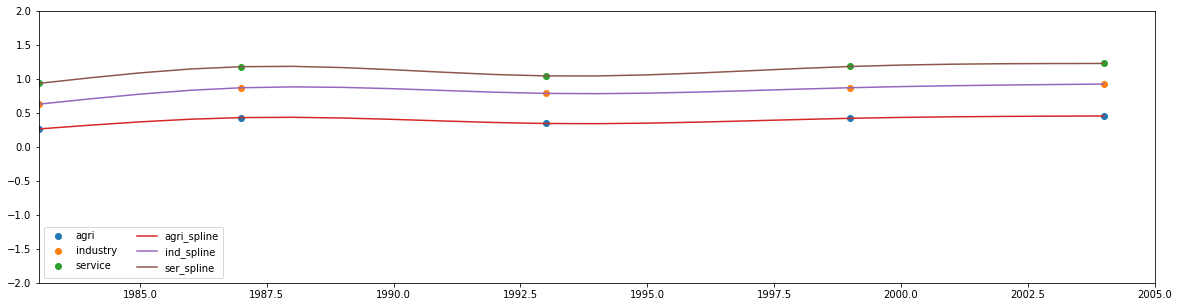

In [64]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
x = [1983, 1987, 1993, 1999, 2004]
human_cap = human_cap.dropna()
y_agri = human_cap.human_cap_agri
y_ind = human_cap.human_cap_ind
y_ser = human_cap.human_cap_ser
cs_agri = CubicSpline(x, y_agri, bc_type='natural')
cs_ind = CubicSpline(x, y_ind, bc_type='natural')
cs_ser = CubicSpline(x, y_ser, bc_type='natural')
xs = np.arange(1983, 2005, 1)
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(x, y_agri, 'o', label='agri')
ax.plot(x, y_ind, 'o', label='industry')
ax.plot(x, y_ser, 'o', label='service')
ax.plot(xs, cs_agri(xs), label="agri_spline")
ax.plot(xs, cs_ind(xs), label="ind_spline")
ax.plot(xs, cs_ser(xs), label="ser_spline")
ax.set_xlim(1983, 2005)
ax.set_ylim(-2, 2)
ax.plot(title="cubic spline results")
ax.legend(loc='lower left', ncol=2)
plt.show()

In [65]:
cs_ind(xs).mean() / cs_agri(xs).mean(), cs_ser(xs).mean() / cs_agri(xs).mean()

(2.121921073171306, 2.873282158997191)

In [66]:
human_cap_agri = []
human_cap_ind = []
human_cap_ser = []

for year in [1983, 1987, 1993, 1999, 2004]:
          Y = data_reg_1.loc[data_reg_1.year == year][['incwage', 'indgen_Agriculture', 'indgen_Industry', 'indgen_service']]
          X = data_reg_1.loc[data_reg_1.year == year][['perwt','sex_male', 'sex_female', 'sex_unknown', 'educin', 'yr_exp', 'yr_exp_squared', 'indgen_Agriculture','indgen_Industry', 'indgen_service','geo1_in_jammu and kashmir', 'geo1_in_himachal pradesh', 'geo1_in_punjab', 'geo1_in_chandigarh', 'geo1_in_haryana', 'geo1_in_delhi', 'geo1_in_rajasthan', 'geo1_in_uttar pradesh, uttaranchal', 'geo1_in_bihar, jharkhand', 'geo1_in_sikkim', 'geo1_in_arunachal pradesh', 'geo1_in_nagaland', 'geo1_in_manipur', 'geo1_in_mizoram', 'geo1_in_tripura', 'geo1_in_meghalaya', 'geo1_in_assam', 'geo1_in_west bengal', 'geo1_in_orissa', 'geo1_in_madhya pradesh, chhattisgarh', 'geo1_in_gujarat', 'geo1_in_dadra and nagar haveli', 'geo1_in_maharashtra', 'geo1_in_andhra pradesh', 'geo1_in_karnataka', 'geo1_in_goa, daman and diu', 'geo1_in_lakshadweep', 'geo1_in_kerala', 'geo1_in_tamil nadu', 'geo1_in_pondicherry', 'geo1_in_andaman and nicobar islands']]
          
          # interaction terms 
          X['indgen_agri_yrschool'] = X['indgen_Agriculture'] * X['educin']
          X['indgen_ind_yrschool'] = X['indgen_Industry'] * X['educin']
          X['indgen_ser_yrschool'] = X['indgen_service'] * X['educin']

          X_reg = X[['indgen_Agriculture', 'indgen_Industry', 'indgen_service', 
          'geo1_in_jammu and kashmir', 'geo1_in_himachal pradesh', 'geo1_in_punjab', 'geo1_in_chandigarh', 'geo1_in_haryana', 'geo1_in_delhi', 'geo1_in_rajasthan', 'geo1_in_uttar pradesh, uttaranchal', 'geo1_in_bihar, jharkhand', 'geo1_in_sikkim', 'geo1_in_arunachal pradesh', 'geo1_in_nagaland', 'geo1_in_manipur', 'geo1_in_mizoram', 'geo1_in_tripura', 'geo1_in_meghalaya', 'geo1_in_assam', 'geo1_in_west bengal', 'geo1_in_orissa', 'geo1_in_madhya pradesh, chhattisgarh', 'geo1_in_gujarat', 'geo1_in_dadra and nagar haveli', 'geo1_in_maharashtra', 'geo1_in_andhra pradesh', 'geo1_in_karnataka', 'geo1_in_goa, daman and diu', 'geo1_in_lakshadweep', 'geo1_in_kerala', 'geo1_in_tamil nadu', 'geo1_in_pondicherry', 'geo1_in_andaman and nicobar islands', 
          'sex_male', 'sex_female', 'sex_unknown',
          'indgen_agri_yrschool', 'indgen_ind_yrschool', 'indgen_ser_yrschool', 
          'yr_exp', 'yr_exp_squared'
          ]]

          #reg = sm.OLS(endog= np.log(Y.incwage), exog= sm.add_constant(X_reg), cov_type = 'HC0')
          #result = reg.fit()

          wregr = linear_model.LinearRegression()
          wregr.fit(X_reg, np.log(Y.incwage), sample_weight = X.perwt) 

          X['human_capital_agri'] = (X.loc[X.indgen_Agriculture == 1]['educin'] * wregr.coef_[37]) + (X.loc[X.indgen_Agriculture == 1]['yr_exp'] * wregr.coef_[40]) + (X.loc[X.indgen_Agriculture == 1]['yr_exp_squared'] * wregr.coef_[41])
          human_cap_agri.append(X['human_capital_agri'].mean())
          
          X['human_capital_ind']= (X.loc[X.indgen_Industry == 1]['educin'] * wregr.coef_[38]) + (X.loc[X.indgen_Industry == 1]['yr_exp'] * wregr.coef_[40]) + (X.loc[X.indgen_Industry == 1]['yr_exp_squared'] * wregr.coef_[41])
          human_cap_ind.append(X['human_capital_ind'].mean())

          X['human_capital_ser'] = (X.loc[X.indgen_service == 1]['educin'] * wregr.coef_[39]) + (X.loc[X.indgen_service == 1]['yr_exp'] * wregr.coef_[40]) + (X.loc[X.indgen_service == 1]['yr_exp_squared'] * wregr.coef_[41])
          human_cap_ser.append(X['human_capital_ser'].mean())

human_cap = pd.DataFrame(index = [1983, 1987, 1993, 1999, 2004], columns=['human_cap_agri', 'human_cap_ind', 'human_cap_ser'])
human_cap.human_cap_agri = human_cap_agri
human_cap.human_cap_ind = human_cap_ind
human_cap.human_cap_ser = human_cap_ser

human_cap['ind/agri'] = human_cap.human_cap_ind / human_cap.human_cap_agri 
human_cap['ser/agri'] = human_cap.human_cap_ser / human_cap.human_cap_agri 
human_cap

,human_cap_agri,human_cap_ind,human_cap_ser,ind/agri,ser/agri
1983,0.26,0.62,0.92,2.38,3.53
1987,0.42,0.86,1.16,2.03,2.74
1993,0.34,0.78,1.03,2.30,3.05
1999,0.42,0.86,1.16,2.05,2.79
2004,0.45,0.90,1.21,2.03,2.71


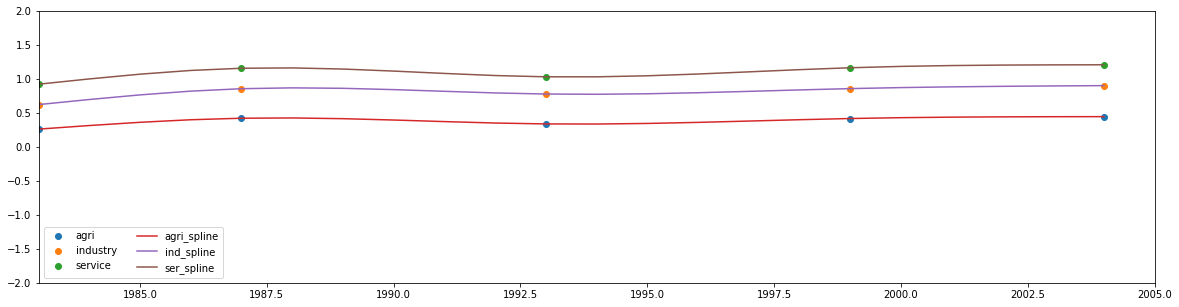

In [67]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
x = [1983, 1987, 1993, 1999, 2004]
human_cap = human_cap.dropna()
y_agri = human_cap.human_cap_agri
y_ind = human_cap.human_cap_ind
y_ser = human_cap.human_cap_ser
cs_agri = CubicSpline(x, y_agri, bc_type='natural')
cs_ind = CubicSpline(x, y_ind, bc_type='natural')
cs_ser = CubicSpline(x, y_ser, bc_type='natural')
xs = np.arange(1983, 2005, 1)
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(x, y_agri, 'o', label='agri')
ax.plot(x, y_ind, 'o', label='industry')
ax.plot(x, y_ser, 'o', label='service')
ax.plot(xs, cs_agri(xs), label="agri_spline")
ax.plot(xs, cs_ind(xs), label="ind_spline")
ax.plot(xs, cs_ser(xs), label="ser_spline")
ax.set_xlim(1983, 2005)
ax.set_ylim(-2, 2)
ax.plot(title="cubic spline results")
ax.legend(loc='lower left', ncol=2)
plt.show()

In [68]:
cs_ind(xs).mean() / cs_agri(xs).mean(), cs_ser(xs).mean() / cs_agri(xs).mean()

(2.1227877662637447, 2.873391830547953)

In [69]:
human_cap_agri = []
human_cap_ind = []
human_cap_ser = []

for year in [1983, 1987, 1993, 1999, 2004]:
          Y = data_reg_1.loc[data_reg_1.year == year][['incwage', 'indgen_Agriculture', 'indgen_Industry', 'indgen_service']]
          X = data_reg_1.loc[data_reg_1.year == year][['perwt','sex_male', 'sex_female', 'sex_unknown', 'educin', 'yr_exp', 'yr_exp_squared', 'indgen_Agriculture','indgen_Industry', 'indgen_service','geo1_in_jammu and kashmir', 'geo1_in_himachal pradesh', 'geo1_in_punjab', 'geo1_in_chandigarh', 'geo1_in_haryana', 'geo1_in_delhi', 'geo1_in_rajasthan', 'geo1_in_uttar pradesh, uttaranchal', 'geo1_in_bihar, jharkhand', 'geo1_in_sikkim', 'geo1_in_arunachal pradesh', 'geo1_in_nagaland', 'geo1_in_manipur', 'geo1_in_mizoram', 'geo1_in_tripura', 'geo1_in_meghalaya', 'geo1_in_assam', 'geo1_in_west bengal', 'geo1_in_orissa', 'geo1_in_madhya pradesh, chhattisgarh', 'geo1_in_gujarat', 'geo1_in_dadra and nagar haveli', 'geo1_in_maharashtra', 'geo1_in_andhra pradesh', 'geo1_in_karnataka', 'geo1_in_goa, daman and diu', 'geo1_in_lakshadweep', 'geo1_in_kerala', 'geo1_in_tamil nadu', 'geo1_in_pondicherry', 'geo1_in_andaman and nicobar islands']]
          
          # interaction terms 
          X['indgen_agri_yrschool'] = X['indgen_Agriculture'] * X['educin']
          X['indgen_ind_yrschool'] = X['indgen_Industry'] * X['educin']
          X['indgen_ser_yrschool'] = X['indgen_service'] * X['educin']

          X_reg = X[['indgen_Agriculture', 'indgen_Industry', 'indgen_service', 
          'geo1_in_jammu and kashmir', 'geo1_in_himachal pradesh', 'geo1_in_punjab', 'geo1_in_chandigarh', 'geo1_in_haryana', 'geo1_in_delhi', 'geo1_in_rajasthan', 'geo1_in_uttar pradesh, uttaranchal', 'geo1_in_bihar, jharkhand', 'geo1_in_sikkim', 'geo1_in_arunachal pradesh', 'geo1_in_nagaland', 'geo1_in_manipur', 'geo1_in_mizoram', 'geo1_in_tripura', 'geo1_in_meghalaya', 'geo1_in_assam', 'geo1_in_west bengal', 'geo1_in_orissa', 'geo1_in_madhya pradesh, chhattisgarh', 'geo1_in_gujarat', 'geo1_in_dadra and nagar haveli', 'geo1_in_maharashtra', 'geo1_in_andhra pradesh', 'geo1_in_karnataka', 'geo1_in_goa, daman and diu', 'geo1_in_lakshadweep', 'geo1_in_kerala', 'geo1_in_tamil nadu', 'geo1_in_pondicherry', 'geo1_in_andaman and nicobar islands', 
          'sex_male', 'sex_female', 'sex_unknown',
          'indgen_agri_yrschool', 'indgen_ind_yrschool', 'indgen_ser_yrschool', 
          'yr_exp', 'yr_exp_squared'
          ]]

          #reg = sm.OLS(endog= np.log(Y.incwage), exog= sm.add_constant(X_reg), cov_type = 'HC0')
          #result = reg.fit()

          wregr = linear_model.LinearRegression()
          wregr.fit(X_reg, np.log(Y.incwage), sample_weight = X.perwt) 

          X['human_capital_agri'] = np.exp((X.loc[X.indgen_Agriculture == 1]['educin'] * wregr.coef_[37]) + (X.loc[X.indgen_Agriculture == 1]['yr_exp'] * wregr.coef_[40]) + (X.loc[X.indgen_Agriculture == 1]['yr_exp_squared'] * wregr.coef_[41]))
          human_cap_agri.append(X['human_capital_agri'].mean())
          print(wregr.coef_[37], wregr.coef_[40])
          
          X['human_capital_ind']= np.exp((X.loc[X.indgen_Industry == 1]['educin'] * wregr.coef_[38]) + (X.loc[X.indgen_Industry == 1]['yr_exp'] * wregr.coef_[40]) + (X.loc[X.indgen_Industry == 1]['yr_exp_squared'] * wregr.coef_[41]))
          human_cap_ind.append(X['human_capital_ind'].mean())

          X['human_capital_ser'] = np.exp((X.loc[X.indgen_service == 1]['educin'] * wregr.coef_[39]) + (X.loc[X.indgen_service == 1]['yr_exp'] * wregr.coef_[40]) + (X.loc[X.indgen_service == 1]['yr_exp_squared'] * wregr.coef_[41]))
          human_cap_ser.append(X['human_capital_ser'].mean())

human_cap = pd.DataFrame(index = [1983, 1987, 1993, 1999, 2004], columns=['human_cap_agri', 'human_cap_ind', 'human_cap_ser'])
human_cap.human_cap_agri = human_cap_agri
human_cap.human_cap_ind = human_cap_ind
human_cap.human_cap_ser = human_cap_ser

human_cap['ind/agri'] = human_cap.human_cap_ind / human_cap.human_cap_agri 
human_cap['ser/agri'] = human_cap.human_cap_ser / human_cap.human_cap_agri 
human_cap

0.021386111877944064 0.025798631470768572
0.03354559593156504 0.04039899787703816
0.02246917836616588 0.031564380645104625
0.02772735909476453 0.03498681366467739
0.01978203414061846 0.0375580155771856


,human_cap_agri,human_cap_ind,human_cap_ser,ind/agri,ser/agri
1983,1.31,2.01,2.87,1.54,2.20
1987,1.55,2.58,3.64,1.66,2.35
1993,1.42,2.37,3.14,1.68,2.22
1999,1.54,2.56,3.66,1.66,2.38
2004,1.58,2.70,3.87,1.71,2.44


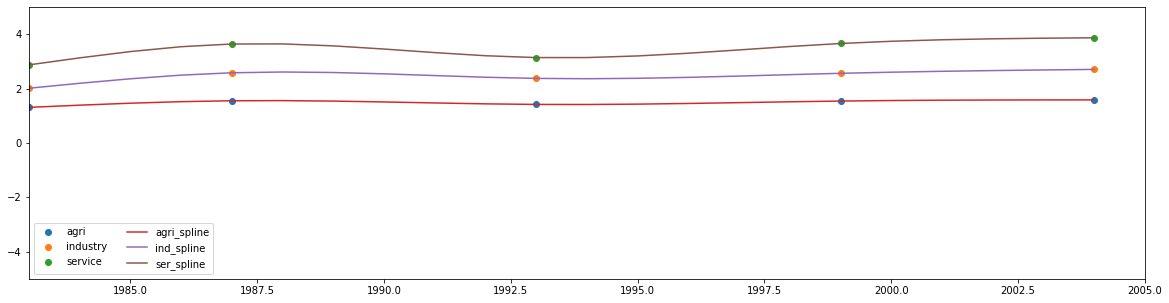

In [70]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
x = [1983, 1987, 1993, 1999, 2004]
human_cap = human_cap.dropna()
y_agri = human_cap.human_cap_agri
y_ind = human_cap.human_cap_ind
y_ser = human_cap.human_cap_ser
cs_agri = CubicSpline(x, y_agri, bc_type='natural')
cs_ind = CubicSpline(x, y_ind, bc_type='natural')
cs_ser = CubicSpline(x, y_ser, bc_type='natural')
xs = np.arange(1983, 2005, 1)
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(x, y_agri, 'o', label='agri')
ax.plot(x, y_ind, 'o', label='industry')
ax.plot(x, y_ser, 'o', label='service')
ax.plot(xs, cs_agri(xs), label="agri_spline")
ax.plot(xs, cs_ind(xs), label="ind_spline")
ax.plot(xs, cs_ser(xs), label="ser_spline")
ax.set_xlim(1983, 2005)
ax.set_ylim(-5, 5)
ax.plot(title="cubic spline results")
ax.legend(loc='lower left', ncol=2)
plt.show()

In [71]:
cs_ind(xs).mean() / cs_agri(xs).mean(), cs_ser(xs).mean() / cs_agri(xs).mean()

(1.662675348193259, 2.320650325016753)

In [72]:
human_cap_agri = []
human_cap_ind = []
human_cap_ser = []

for year in [1983, 1987, 1993, 1999, 2004]:
          Y = data_reg_1.loc[data_reg_1.year == year][['incwage', 'indgen_Agriculture', 'indgen_Industry', 'indgen_service']]
          X = data_reg_1.loc[data_reg_1.year == year][['perwt','sex_male', 'sex_female', 'sex_unknown', 'educin', 'yr_exp', 'yr_exp_squared', 'indgen_Agriculture','indgen_Industry', 'indgen_service','geo1_in_jammu and kashmir', 'geo1_in_himachal pradesh', 'geo1_in_punjab', 'geo1_in_chandigarh', 'geo1_in_haryana', 'geo1_in_delhi', 'geo1_in_rajasthan', 'geo1_in_uttar pradesh, uttaranchal', 'geo1_in_bihar, jharkhand', 'geo1_in_sikkim', 'geo1_in_arunachal pradesh', 'geo1_in_nagaland', 'geo1_in_manipur', 'geo1_in_mizoram', 'geo1_in_tripura', 'geo1_in_meghalaya', 'geo1_in_assam', 'geo1_in_west bengal', 'geo1_in_orissa', 'geo1_in_madhya pradesh, chhattisgarh', 'geo1_in_gujarat', 'geo1_in_dadra and nagar haveli', 'geo1_in_maharashtra', 'geo1_in_andhra pradesh', 'geo1_in_karnataka', 'geo1_in_goa, daman and diu', 'geo1_in_lakshadweep', 'geo1_in_kerala', 'geo1_in_tamil nadu', 'geo1_in_pondicherry', 'geo1_in_andaman and nicobar islands']]
          
          # interaction terms 
          X['indgen_agri_yrschool'] = X['indgen_Agriculture'] * X['educin']
          X['indgen_ind_yrschool'] = X['indgen_Industry'] * X['educin']
          X['indgen_ser_yrschool'] = X['indgen_service'] * X['educin']

          X_reg = X[['indgen_Agriculture', 'indgen_Industry', 'indgen_service', 
          'geo1_in_jammu and kashmir', 'geo1_in_himachal pradesh', 'geo1_in_punjab', 'geo1_in_chandigarh', 'geo1_in_haryana', 'geo1_in_delhi', 'geo1_in_rajasthan', 'geo1_in_uttar pradesh, uttaranchal', 'geo1_in_bihar, jharkhand', 'geo1_in_sikkim', 'geo1_in_arunachal pradesh', 'geo1_in_nagaland', 'geo1_in_manipur', 'geo1_in_mizoram', 'geo1_in_tripura', 'geo1_in_meghalaya', 'geo1_in_assam', 'geo1_in_west bengal', 'geo1_in_orissa', 'geo1_in_madhya pradesh, chhattisgarh', 'geo1_in_gujarat', 'geo1_in_dadra and nagar haveli', 'geo1_in_maharashtra', 'geo1_in_andhra pradesh', 'geo1_in_karnataka', 'geo1_in_goa, daman and diu', 'geo1_in_lakshadweep', 'geo1_in_kerala', 'geo1_in_tamil nadu', 'geo1_in_pondicherry', 'geo1_in_andaman and nicobar islands', 
          'sex_male', 'sex_female', 'sex_unknown',
          'indgen_agri_yrschool', 'indgen_ind_yrschool', 'indgen_ser_yrschool', 
          'yr_exp', 'yr_exp_squared'
          ]]

          #reg = sm.OLS(endog= np.log(Y.incwage), exog= sm.add_constant(X_reg), cov_type = 'HC0')
          #result = reg.fit()

          wregr = linear_model.LinearRegression()
          wregr.fit(X_reg, np.log(Y.incwage), sample_weight = X.perwt) 

          X['human_capital_agri'] = np.exp(X.loc[X.indgen_Agriculture == 1]['educin'] * wregr.coef_[37])
          human_cap_agri.append(X['human_capital_agri'].mean())
          
          X['human_capital_ind']= np.exp(X.loc[X.indgen_Industry == 1]['educin'] * wregr.coef_[38]) 
          human_cap_ind.append(X['human_capital_ind'].mean())

          X['human_capital_ser'] = np.exp(X.loc[X.indgen_service == 1]['educin'] * wregr.coef_[39]) 
          
          human_cap_ser.append(X['human_capital_ser'].mean())

human_cap = pd.DataFrame(index = [1983, 1987, 1993, 1999, 2004], columns=['human_cap_agri', 'human_cap_ind', 'human_cap_ser'])
human_cap.human_cap_agri = human_cap_agri
human_cap.human_cap_ind = human_cap_ind
human_cap.human_cap_ser = human_cap_ser

human_cap['ind/agri'] = human_cap.human_cap_ind / human_cap.human_cap_agri 
human_cap['ser/agri'] = human_cap.human_cap_ser / human_cap.human_cap_agri 
human_cap

,human_cap_agri,human_cap_ind,human_cap_ser,ind/agri,ser/agri
1983,1.02,1.59,2.23,1.55,2.18
1987,1.04,1.74,2.39,1.67,2.30
1993,1.04,1.75,2.26,1.68,2.17
1999,1.06,1.79,2.47,1.69,2.33
2004,1.05,1.86,2.55,1.77,2.42


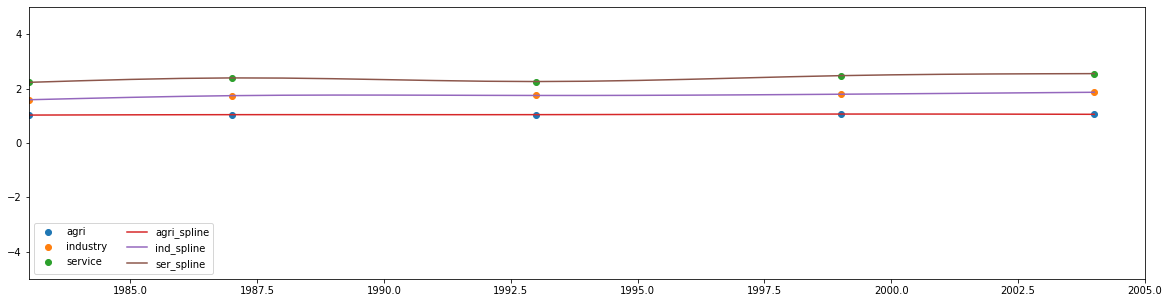

In [84]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
x = [1983, 1987, 1993, 1999, 2004]
human_cap = human_cap.dropna()
y_agri = human_cap.human_cap_agri
y_ind = human_cap.human_cap_ind
y_ser = human_cap.human_cap_ser
cs_agri = CubicSpline(x, y_agri, bc_type='natural')
cs_ind = CubicSpline(x, y_ind, bc_type='natural')
cs_ser = CubicSpline(x, y_ser, bc_type='natural')
xs = np.arange(1983, 2005, 1)
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(x, y_agri, 'o', label='agri')
ax.plot(x, y_ind, 'o', label='industry')
ax.plot(x, y_ser, 'o', label='service')
ax.plot(xs, cs_agri(xs), label="agri_spline")
ax.plot(xs, cs_ind(xs), label="ind_spline")
ax.plot(xs, cs_ser(xs), label="ser_spline")
ax.set_xlim(1983, 2005)
ax.set_ylim(-5, 5)
ax.legend(loc='lower left', ncol=2)
plt.plot(title="cubic spline results")
plt.show()

In [74]:
human_capital = pd.DataFrame(index = xs, columns = ['agri', 'ind', 'service']) 
human_capital.agri = cs_agri(xs)
human_capital.ind = cs_ind(xs)
human_capital.service = cs_ser(xs)
human_capital

,agri,ind,service
1983,1.02,1.59,2.23
1984,1.03,1.63,2.29
1985,1.03,1.68,2.34
1986,1.04,1.71,2.37
1987,1.04,1.74,2.39
1988,1.04,1.75,2.39
1989,1.04,1.76,2.36
1990,1.04,1.76,2.33
1991,1.04,1.75,2.29
1992,1.04,1.75,2.27


In [75]:
human_capital = human_capital.reindex(np.arange(1960, 2011, 1))
human_capital = human_capital.bfill(axis ='rows')
human_capital = human_capital.ffill(axis ='rows')
# human_capital
human_capital.to_csv("human_cap.csv")

In [76]:
human_capital

,agri,ind,service
1960,1.02,1.59,2.23
1961,1.02,1.59,2.23
1962,1.02,1.59,2.23
1963,1.02,1.59,2.23
1964,1.02,1.59,2.23
1965,1.02,1.59,2.23
1966,1.02,1.59,2.23
1967,1.02,1.59,2.23
1968,1.02,1.59,2.23
1969,1.02,1.59,2.23


In [77]:
cs_ind(xs).mean() / cs_agri(xs).mean(), cs_ser(xs).mean() / cs_agri(xs).mean()

(1.6793718481175364, 2.2769335769651438)

In [78]:
import statsmodels.api as sm

In [79]:
year = [[1983, 1987, 1993, 1999, 2004]]
Y = data_reg_1.loc[data_reg_1.year == 1983][['incwage', 'indgen_Agriculture', 'indgen_Industry', 'indgen_service']]
X = data_reg_1.loc[data_reg_1.year == 1983][['perwt','sex_male', 'sex_female', 'sex_unknown', 'educin', 'yr_exp', 'yr_exp_squared', 'indgen_Agriculture','indgen_Industry', 'indgen_service','geo1_in_jammu and kashmir', 'geo1_in_himachal pradesh', 'geo1_in_punjab', 'geo1_in_chandigarh', 'geo1_in_haryana', 'geo1_in_delhi', 'geo1_in_rajasthan', 'geo1_in_uttar pradesh, uttaranchal', 'geo1_in_bihar, jharkhand', 'geo1_in_sikkim', 'geo1_in_arunachal pradesh', 'geo1_in_nagaland', 'geo1_in_manipur', 'geo1_in_mizoram', 'geo1_in_tripura', 'geo1_in_meghalaya', 'geo1_in_assam', 'geo1_in_west bengal', 'geo1_in_orissa', 'geo1_in_madhya pradesh, chhattisgarh', 'geo1_in_gujarat', 'geo1_in_dadra and nagar haveli', 'geo1_in_maharashtra', 'geo1_in_andhra pradesh', 'geo1_in_karnataka', 'geo1_in_goa, daman and diu', 'geo1_in_lakshadweep', 'geo1_in_kerala', 'geo1_in_tamil nadu', 'geo1_in_pondicherry', 'geo1_in_andaman and nicobar islands']]
          
# interaction terms 
X['indgen_agri_yrschool'] = X['indgen_Agriculture'] * X['educin']
X['indgen_ind_yrschool'] = X['indgen_Industry'] * X['educin']
X['indgen_ser_yrschool'] = X['indgen_service'] * X['educin']

X_reg = X[['indgen_Agriculture', 'indgen_Industry', 'indgen_service', 
          'geo1_in_jammu and kashmir', 'geo1_in_himachal pradesh', 'geo1_in_punjab', 'geo1_in_chandigarh', 'geo1_in_haryana', 'geo1_in_delhi', 'geo1_in_rajasthan', 'geo1_in_uttar pradesh, uttaranchal', 'geo1_in_bihar, jharkhand', 'geo1_in_sikkim', 'geo1_in_arunachal pradesh', 'geo1_in_nagaland', 'geo1_in_manipur', 'geo1_in_mizoram', 'geo1_in_tripura', 'geo1_in_meghalaya', 'geo1_in_assam', 'geo1_in_west bengal', 'geo1_in_orissa', 'geo1_in_madhya pradesh, chhattisgarh', 'geo1_in_gujarat', 'geo1_in_dadra and nagar haveli', 'geo1_in_maharashtra', 'geo1_in_andhra pradesh', 'geo1_in_karnataka', 'geo1_in_goa, daman and diu', 'geo1_in_lakshadweep', 'geo1_in_kerala', 'geo1_in_tamil nadu', 'geo1_in_pondicherry', 'geo1_in_andaman and nicobar islands', 
          'sex_male', 'sex_female', 'sex_unknown',
          'indgen_agri_yrschool', 'indgen_ind_yrschool', 'indgen_ser_yrschool', 
          'yr_exp', 'yr_exp_squared'
          ]]

reg = sm.WLS(endog= np.log(Y.incwage), exog= sm.add_constant(X_reg), weights = X.perwt, cov_type = 'HC0')
result_1983 = reg.fit()
#result.summary()

# 1987
Y = data_reg_1.loc[data_reg_1.year == 1987][['incwage', 'indgen_Agriculture', 'indgen_Industry', 'indgen_service']]
X = data_reg_1.loc[data_reg_1.year == 1987][['perwt','sex_male', 'sex_female', 'sex_unknown', 'educin', 'yr_exp', 'yr_exp_squared', 'indgen_Agriculture','indgen_Industry', 'indgen_service','geo1_in_jammu and kashmir', 'geo1_in_himachal pradesh', 'geo1_in_punjab', 'geo1_in_chandigarh', 'geo1_in_haryana', 'geo1_in_delhi', 'geo1_in_rajasthan', 'geo1_in_uttar pradesh, uttaranchal', 'geo1_in_bihar, jharkhand', 'geo1_in_sikkim', 'geo1_in_arunachal pradesh', 'geo1_in_nagaland', 'geo1_in_manipur', 'geo1_in_mizoram', 'geo1_in_tripura', 'geo1_in_meghalaya', 'geo1_in_assam', 'geo1_in_west bengal', 'geo1_in_orissa', 'geo1_in_madhya pradesh, chhattisgarh', 'geo1_in_gujarat', 'geo1_in_dadra and nagar haveli', 'geo1_in_maharashtra', 'geo1_in_andhra pradesh', 'geo1_in_karnataka', 'geo1_in_goa, daman and diu', 'geo1_in_lakshadweep', 'geo1_in_kerala', 'geo1_in_tamil nadu', 'geo1_in_pondicherry', 'geo1_in_andaman and nicobar islands']]
          
# interaction terms 
X['indgen_agri_yrschool'] = X['indgen_Agriculture'] * X['educin']
X['indgen_ind_yrschool'] = X['indgen_Industry'] * X['educin']
X['indgen_ser_yrschool'] = X['indgen_service'] * X['educin']

X_reg = X[['indgen_Agriculture', 'indgen_Industry', 'indgen_service', 
          'geo1_in_jammu and kashmir', 'geo1_in_himachal pradesh', 'geo1_in_punjab', 'geo1_in_chandigarh', 'geo1_in_haryana', 'geo1_in_delhi', 'geo1_in_rajasthan', 'geo1_in_uttar pradesh, uttaranchal', 'geo1_in_bihar, jharkhand', 'geo1_in_sikkim', 'geo1_in_arunachal pradesh', 'geo1_in_nagaland', 'geo1_in_manipur', 'geo1_in_mizoram', 'geo1_in_tripura', 'geo1_in_meghalaya', 'geo1_in_assam', 'geo1_in_west bengal', 'geo1_in_orissa', 'geo1_in_madhya pradesh, chhattisgarh', 'geo1_in_gujarat', 'geo1_in_dadra and nagar haveli', 'geo1_in_maharashtra', 'geo1_in_andhra pradesh', 'geo1_in_karnataka', 'geo1_in_goa, daman and diu', 'geo1_in_lakshadweep', 'geo1_in_kerala', 'geo1_in_tamil nadu', 'geo1_in_pondicherry', 'geo1_in_andaman and nicobar islands', 
          'sex_male', 'sex_female', 'sex_unknown',
          'indgen_agri_yrschool', 'indgen_ind_yrschool', 'indgen_ser_yrschool', 
          'yr_exp', 'yr_exp_squared'
          ]]

reg = sm.WLS(endog= np.log(Y.incwage), exog= sm.add_constant(X_reg), weights = X.perwt, cov_type = 'HC0')
result_1987 = reg.fit()

# 1993
Y = data_reg_1.loc[data_reg_1.year == 1993][['incwage', 'indgen_Agriculture', 'indgen_Industry', 'indgen_service']]
X = data_reg_1.loc[data_reg_1.year == 1993][['perwt','sex_male', 'sex_female', 'sex_unknown', 'educin', 'yr_exp', 'yr_exp_squared', 'indgen_Agriculture','indgen_Industry', 'indgen_service','geo1_in_jammu and kashmir', 'geo1_in_himachal pradesh', 'geo1_in_punjab', 'geo1_in_chandigarh', 'geo1_in_haryana', 'geo1_in_delhi', 'geo1_in_rajasthan', 'geo1_in_uttar pradesh, uttaranchal', 'geo1_in_bihar, jharkhand', 'geo1_in_sikkim', 'geo1_in_arunachal pradesh', 'geo1_in_nagaland', 'geo1_in_manipur', 'geo1_in_mizoram', 'geo1_in_tripura', 'geo1_in_meghalaya', 'geo1_in_assam', 'geo1_in_west bengal', 'geo1_in_orissa', 'geo1_in_madhya pradesh, chhattisgarh', 'geo1_in_gujarat', 'geo1_in_dadra and nagar haveli', 'geo1_in_maharashtra', 'geo1_in_andhra pradesh', 'geo1_in_karnataka', 'geo1_in_goa, daman and diu', 'geo1_in_lakshadweep', 'geo1_in_kerala', 'geo1_in_tamil nadu', 'geo1_in_pondicherry', 'geo1_in_andaman and nicobar islands']]
          
# interaction terms 
X['indgen_agri_yrschool'] = X['indgen_Agriculture'] * X['educin']
X['indgen_ind_yrschool'] = X['indgen_Industry'] * X['educin']
X['indgen_ser_yrschool'] = X['indgen_service'] * X['educin']

X_reg = X[['indgen_Agriculture', 'indgen_Industry', 'indgen_service', 
          'geo1_in_jammu and kashmir', 'geo1_in_himachal pradesh', 'geo1_in_punjab', 'geo1_in_chandigarh', 'geo1_in_haryana', 'geo1_in_delhi', 'geo1_in_rajasthan', 'geo1_in_uttar pradesh, uttaranchal', 'geo1_in_bihar, jharkhand', 'geo1_in_sikkim', 'geo1_in_arunachal pradesh', 'geo1_in_nagaland', 'geo1_in_manipur', 'geo1_in_mizoram', 'geo1_in_tripura', 'geo1_in_meghalaya', 'geo1_in_assam', 'geo1_in_west bengal', 'geo1_in_orissa', 'geo1_in_madhya pradesh, chhattisgarh', 'geo1_in_gujarat', 'geo1_in_dadra and nagar haveli', 'geo1_in_maharashtra', 'geo1_in_andhra pradesh', 'geo1_in_karnataka', 'geo1_in_goa, daman and diu', 'geo1_in_lakshadweep', 'geo1_in_kerala', 'geo1_in_tamil nadu', 'geo1_in_pondicherry', 'geo1_in_andaman and nicobar islands', 
          'sex_male', 'sex_female', 'sex_unknown',
          'indgen_agri_yrschool', 'indgen_ind_yrschool', 'indgen_ser_yrschool', 
          'yr_exp', 'yr_exp_squared'
          ]]

reg = sm.WLS(endog= np.log(Y.incwage), exog= sm.add_constant(X_reg), weights = X.perwt, cov_type = 'HC0')
result_1993 = reg.fit()

# 1999
Y = data_reg_1.loc[data_reg_1.year == 1999][['incwage', 'indgen_Agriculture', 'indgen_Industry', 'indgen_service']]
X = data_reg_1.loc[data_reg_1.year == 1999][['perwt','sex_male', 'sex_female', 'sex_unknown', 'educin', 'yr_exp', 'yr_exp_squared', 'indgen_Agriculture','indgen_Industry', 'indgen_service','geo1_in_jammu and kashmir', 'geo1_in_himachal pradesh', 'geo1_in_punjab', 'geo1_in_chandigarh', 'geo1_in_haryana', 'geo1_in_delhi', 'geo1_in_rajasthan', 'geo1_in_uttar pradesh, uttaranchal', 'geo1_in_bihar, jharkhand', 'geo1_in_sikkim', 'geo1_in_arunachal pradesh', 'geo1_in_nagaland', 'geo1_in_manipur', 'geo1_in_mizoram', 'geo1_in_tripura', 'geo1_in_meghalaya', 'geo1_in_assam', 'geo1_in_west bengal', 'geo1_in_orissa', 'geo1_in_madhya pradesh, chhattisgarh', 'geo1_in_gujarat', 'geo1_in_dadra and nagar haveli', 'geo1_in_maharashtra', 'geo1_in_andhra pradesh', 'geo1_in_karnataka', 'geo1_in_goa, daman and diu', 'geo1_in_lakshadweep', 'geo1_in_kerala', 'geo1_in_tamil nadu', 'geo1_in_pondicherry', 'geo1_in_andaman and nicobar islands']]
          
# interaction terms 
X['indgen_agri_yrschool'] = X['indgen_Agriculture'] * X['educin']
X['indgen_ind_yrschool'] = X['indgen_Industry'] * X['educin']
X['indgen_ser_yrschool'] = X['indgen_service'] * X['educin']

X_reg = X[['indgen_Agriculture', 'indgen_Industry', 'indgen_service', 
          'geo1_in_jammu and kashmir', 'geo1_in_himachal pradesh', 'geo1_in_punjab', 'geo1_in_chandigarh', 'geo1_in_haryana', 'geo1_in_delhi', 'geo1_in_rajasthan', 'geo1_in_uttar pradesh, uttaranchal', 'geo1_in_bihar, jharkhand', 'geo1_in_sikkim', 'geo1_in_arunachal pradesh', 'geo1_in_nagaland', 'geo1_in_manipur', 'geo1_in_mizoram', 'geo1_in_tripura', 'geo1_in_meghalaya', 'geo1_in_assam', 'geo1_in_west bengal', 'geo1_in_orissa', 'geo1_in_madhya pradesh, chhattisgarh', 'geo1_in_gujarat', 'geo1_in_dadra and nagar haveli', 'geo1_in_maharashtra', 'geo1_in_andhra pradesh', 'geo1_in_karnataka', 'geo1_in_goa, daman and diu', 'geo1_in_lakshadweep', 'geo1_in_kerala', 'geo1_in_tamil nadu', 'geo1_in_pondicherry', 'geo1_in_andaman and nicobar islands', 
          'sex_male', 'sex_female', 'sex_unknown',
          'indgen_agri_yrschool', 'indgen_ind_yrschool', 'indgen_ser_yrschool', 
          'yr_exp', 'yr_exp_squared'
          ]]

reg = sm.WLS(endog= np.log(Y.incwage), exog= sm.add_constant(X_reg), weights = X.perwt, cov_type = 'HC0')
result_1999 = reg.fit()

# 2004
Y = data_reg_1.loc[data_reg_1.year == 2004][['incwage', 'indgen_Agriculture', 'indgen_Industry', 'indgen_service']]
X = data_reg_1.loc[data_reg_1.year == 2004][['perwt','sex_male', 'sex_female', 'sex_unknown', 'educin', 'yr_exp', 'yr_exp_squared', 'indgen_Agriculture','indgen_Industry', 'indgen_service','geo1_in_jammu and kashmir', 'geo1_in_himachal pradesh', 'geo1_in_punjab', 'geo1_in_chandigarh', 'geo1_in_haryana', 'geo1_in_delhi', 'geo1_in_rajasthan', 'geo1_in_uttar pradesh, uttaranchal', 'geo1_in_bihar, jharkhand', 'geo1_in_sikkim', 'geo1_in_arunachal pradesh', 'geo1_in_nagaland', 'geo1_in_manipur', 'geo1_in_mizoram', 'geo1_in_tripura', 'geo1_in_meghalaya', 'geo1_in_assam', 'geo1_in_west bengal', 'geo1_in_orissa', 'geo1_in_madhya pradesh, chhattisgarh', 'geo1_in_gujarat', 'geo1_in_dadra and nagar haveli', 'geo1_in_maharashtra', 'geo1_in_andhra pradesh', 'geo1_in_karnataka', 'geo1_in_goa, daman and diu', 'geo1_in_lakshadweep', 'geo1_in_kerala', 'geo1_in_tamil nadu', 'geo1_in_pondicherry', 'geo1_in_andaman and nicobar islands']]
          
# interaction terms 
X['indgen_agri_yrschool'] = X['indgen_Agriculture'] * X['educin']
X['indgen_ind_yrschool'] = X['indgen_Industry'] * X['educin']
X['indgen_ser_yrschool'] = X['indgen_service'] * X['educin']

X_reg = X[['indgen_Agriculture', 'indgen_Industry', 'indgen_service', 
          'geo1_in_jammu and kashmir', 'geo1_in_himachal pradesh', 'geo1_in_punjab', 'geo1_in_chandigarh', 'geo1_in_haryana', 'geo1_in_delhi', 'geo1_in_rajasthan', 'geo1_in_uttar pradesh, uttaranchal', 'geo1_in_bihar, jharkhand', 'geo1_in_sikkim', 'geo1_in_arunachal pradesh', 'geo1_in_nagaland', 'geo1_in_manipur', 'geo1_in_mizoram', 'geo1_in_tripura', 'geo1_in_meghalaya', 'geo1_in_assam', 'geo1_in_west bengal', 'geo1_in_orissa', 'geo1_in_madhya pradesh, chhattisgarh', 'geo1_in_gujarat', 'geo1_in_dadra and nagar haveli', 'geo1_in_maharashtra', 'geo1_in_andhra pradesh', 'geo1_in_karnataka', 'geo1_in_goa, daman and diu', 'geo1_in_lakshadweep', 'geo1_in_kerala', 'geo1_in_tamil nadu', 'geo1_in_pondicherry', 'geo1_in_andaman and nicobar islands', 
          'sex_male', 'sex_female', 'sex_unknown',
          'indgen_agri_yrschool', 'indgen_ind_yrschool', 'indgen_ser_yrschool', 
          'yr_exp', 'yr_exp_squared'
          ]]

reg = sm.WLS(endog= np.log(Y.incwage), exog= sm.add_constant(X_reg), weights = X.perwt, cov_type = 'HC0')
result_2004 = reg.fit()

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [80]:
results_table  = summary_col(results = [result_1983, result_1987, result_1993, result_1999, result_2004],
                              float_format= '%0.2f',
                              model_names=['1983', '1987', '1993', '1999', '2004'],
                              regressor_order=['indgen_Agriculture', 'indgen_Industry', 'indgen_service', 
                              'sex_male', 'sex_female', 'sex_unknown',
                              'indgen_agri_yrschool', 'indgen_ind_yrschool', 'indgen_ser_yrschool', 
                              'yr_exp', 'yr_exp_squared'],
                              drop_omitted=True,
                              stars = True)
results_table.add_title(title = "Mincer Return: Results from Earnings Regressions", results= None)
print(results_table)

        Mincer Return: Results from Earnings Regressions
                       1983     1987     1993     1999     2004  
-----------------------------------------------------------------
indgen_Agriculture   0.37***  0.41***  0.64***  0.66***  0.72*** 
                     (0.01)   (0.01)   (0.02)   (0.01)   (0.01)  
indgen_Industry      0.84***  0.87***  1.02***  1.10***  1.09*** 
                     (0.01)   (0.01)   (0.02)   (0.01)   (0.01)  
indgen_service       0.70***  0.78***  1.00***  1.01***  1.02*** 
                     (0.01)   (0.01)   (0.02)   (0.01)   (0.01)  
sex_male             1.18***  1.30***  1.11***  1.58***  1.63*** 
                     (0.01)   (0.01)   (0.08)   (0.01)   (0.00)  
sex_female           0.73***  0.76***  0.68***  1.18***  1.19*** 
                     (0.01)   (0.01)   (0.08)   (0.01)   (0.00)  
sex_unknown          -0.00    -0.00    0.87***  -0.00    -0.00   
                     (0.00)   (0.00)   (0.21)   (0.00)   (0.00)  
indgen_agri_yrschoo

In [81]:
print(results_table.as_latex())

\begin{table}
\caption{Mincer Return: Results from Earnings Regressions}
\label{}
\begin{center}
\begin{tabular}{llllll}
\hline
                       & 1983     & 1987     & 1993     & 1999     & 2004      \\
\hline
indgen\_Agriculture    & 0.37***  & 0.41***  & 0.64***  & 0.66***  & 0.72***   \\
                       & (0.01)   & (0.01)   & (0.02)   & (0.01)   & (0.01)    \\
indgen\_Industry       & 0.84***  & 0.87***  & 1.02***  & 1.10***  & 1.09***   \\
                       & (0.01)   & (0.01)   & (0.02)   & (0.01)   & (0.01)    \\
indgen\_service        & 0.70***  & 0.78***  & 1.00***  & 1.01***  & 1.02***   \\
                       & (0.01)   & (0.01)   & (0.02)   & (0.01)   & (0.01)    \\
sex\_male              & 1.18***  & 1.30***  & 1.11***  & 1.58***  & 1.63***   \\
                       & (0.01)   & (0.01)   & (0.08)   & (0.01)   & (0.00)    \\
sex\_female            & 0.73***  & 0.76***  & 0.68***  & 1.18***  & 1.19***   \\
                       & (0.01)   & (0.01)   